Imports

In [2]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from datetime import date, timedelta

#for ML

import numpy as np
import datetime

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from scipy.optimize import curve_fit

from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import math

##Example of RandomForestRegressor (ML pt2)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

Import files

In [3]:
def test(Sensors, df):
    Test = {}
    maxim = len(Sensors.columns)
    for i,col in enumerate(Sensors.columns):
        materials = []
        if i == maxim-1:
            for j,material in enumerate(Sensors[col]):
                f = materials.count(material)+1            
                materials.append(material)
                if list(Test.keys()).count(material + str(f)) == 1:
                    Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                        df[col:][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })])
                else:
                    Test[material + str(f)] = df[col:][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })    
        else:
            for j,material in enumerate(Sensors[col]):
                f = materials.count(material)+1            
                materials.append(material)
                if list(Test.keys()).count(material + str(f)) == 1:
                    Test[material + str(f)] = pd.concat([Test[material + str(f)],
                                                        df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })
                                                        ])
                else:
                    Test[material + str(f)] = df[col:Sensors.columns[i+1]][["R"+str(j+1),
                                                                    "T"+str(j+1),
                                                                    "V"+str(j+1)]].rename(columns = {
                                                            "R"+str(j+1):"R",
                                                            "T"+str(j+1):"HT",
                                                            "V"+str(j+1):"V"
                                                        })
    return Test



Sensors_ViaBolz = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa2_timeline.csv",
                     sep = ",")
Sensors_ViaBolz.set_index("channel", inplace = True)
Sensors_ViaBolz = Sensors_ViaBolz.applymap(lambda x: x.replace("*", ""))

df_ViaBolz = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/ViaBolz.csv",
             sep = ",",
             parse_dates = ["ts"])
df_ViaBolz.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
df_ViaBolz = df_ViaBolz.rename(columns=change)
test_ViaBolz=test(Sensors_ViaBolz, df_ViaBolz)


# Sensors_StChiara = pd.read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa1_timeline.csv",
#                      sep = ",")
# Sensors_StChiara.set_index("channel", inplace = True)
# Sensors_StChiara = Sensors_StChiara.applymap(lambda x: x.replace("*", ""))

# df_StChiara = read_csv("c:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",
#              sep = ",",
#              parse_dates = ["ts"])
# df_StChiara.set_index("ts", inplace = True)

# change = {}
# for i in range(1,9):
#     change["S" +str(i)+"_R1"] = "T" + str(i)
#     change["S" +str(i)+"_R2"] = "R" + str(i)
#     change["S"+ str(i)+"_Voltage"] = "V"+str(i)
# df_StChiara = df_StChiara.rename(columns=change)
# test_StChiara=test(Sensors_StChiara, df_StChiara)







#ML Bea


def tempo(df):
    timezone_offset = datetime.timedelta(hours=2)
    timezone = datetime.timezone(timezone_offset)
    df.ts = df.ts.apply(lambda x: x.replace(tzinfo=timezone))
    return df.ts


Sensors = read_csv("C:/Users/ricca/OneDrive/challenge3/OneDrive_1_30-6-2023/appa1_timeline.csv",
                     sep = ",")
Sensors.set_index("channel", inplace = True)
Sensors = Sensors.applymap(lambda x: x.replace("*", ""))

dfSC = read_csv("C:/Users/ricca/OneDrive/challenge3/WebValley2023-20230628T073810Z-001/WebValley2023/DataSet_FBK/StChiara.csv",
             sep = ",",
             parse_dates = ["ts"])
dfSC.set_index("ts", inplace = True)

change = {}
for i in range(1,9):
    change["S" +str(i)+"_R1"] = "T" + str(i)
    change["S" +str(i)+"_R2"] = "R" + str(i)
    change["S"+ str(i)+"_Voltage"] = "V"+str(i)
dfSC = dfSC.rename(columns=change)
test_Bea_StChiara = test(Sensors, dfSC)

dfSC = dfSC.apply(pd.to_numeric, errors='coerce')
dfSC = dfSC.dropna() #this has to be df1, ecc...


dfAPPA = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA1.csv", parse_dates=["Time"])
dfAPPA = dfAPPA.rename(columns={"Time": "ts"})
                                

dfAPPA.ts = tempo(dfAPPA)

dfAPPA.rename(columns = {"Time":"ts"}, inplace= True)


ViaBolz, dati

In [8]:
start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def funzione_df_primario(start_date, end_date, df):
    date_vere=[]
    date_tot=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]
            date_vere.append(single_date)
        except:
            date_tot.append(single_date)
    return df_slice, date_vere, date_tot


def funzione_df_secondario(start_date, end_date, df):
    date_tot1=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]      
        except:
            date_tot1.append(single_date)
    return df_slice, date_tot1 


def unione(start_date, end_date, date_vere, date_tot, df_intero, df_base):
    date_aggiunte=[]
    for single_date in daterange(start_date, end_date):
        if single_date not in date_vere:
            if single_date not in date_tot:
                date_vere.append(single_date)
                date_aggiunte.append(single_date)
                df_intero=pd.concat([df_intero,df_base.loc[str(single_date)]])


# df1-2
date_vere_group1=[]
date_tot_group1=[]
date_aggiunte_group1=[]
date_tot1_group1=[]
df_slice1=[]
df_slice2=[]

df1 = test_ViaBolz["LaFeO31"]
df1=df1.dropna(how="all")
df1 = df1.loc[df1.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

df2 = test_ViaBolz["LaFeO32"]
df2=df2.dropna(how="all")
df2 = df2.loc[df2.R < 0.7e8]
fig = plt.figure(figsize=(15,5))

df_slice1, date_vere_group1, date_tot_group1 = funzione_df_primario(start_date, end_date, df1)
df_slice2, date_tot1_group1= funzione_df_secondario(start_date, end_date, df2)


unione(start_date, end_date, date_vere_group1, date_tot1_group1, df1, df2)
# date_vere_group1.sort
df1 = df1.sort_index()
print(df1)



# df3-4
date_vere_group2=[]
date_tot_group2=[]
date_aggiunte_group2=[]
date_tot1_group2=[]
df_slice3=[]
df_slice4=[]

df3 = test_ViaBolz["WO31"]
df3=df3.dropna(how="all")
df3 = df3.loc[df3.R < 0.18e8]
fig = plt.figure(figsize=(15,5))

df4 = test_ViaBolz["WO32"]
df4=df4.dropna(how="all")
df4 = df4.loc[df4.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df_slice3, date_tot1_group2=funzione_df_secondario(start_date, end_date, df3)
df_slice4, date_vere_group2, date_tot_group2=funzione_df_primario(start_date, end_date, df4)

unione(start_date, end_date, date_vere_group2, date_tot1_group2, df4, df3)
# date_vere_group2.sort
df4 = df4.sort_index()
print(df4)



# df5-6
date_vere_group3=[]
date_tot_group3=[]
date_aggiunte_group3=[]
date_tot1_group3=[]
df_slice5=[]
df_slice6=[]

df5 = test_ViaBolz["ZnO1"]
df5=df5.dropna(how="all")
df5 = df5.loc[df5.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df6 = test_ViaBolz["ZnO2"]
df6=df6.dropna(how="all")
df6 = df6.loc[df6.R < 3.7e8]
fig = plt.figure(figsize=(15,5))

df_slice5, date_vere_group3, date_tot_group3=funzione_df_primario(start_date, end_date, df5)
df_slice6, date_tot1_group3=funzione_df_secondario(start_date, end_date, df6)

unione(start_date, end_date, date_vere_group3, date_tot1_group3, df5, df6)
# date_vere_group3.sort
df5 = df5.sort_index()
print(df5)


# df7-8
# DF3
date_vere_group4=[]
date_tot_group4=[]
date_aggiunte_group4=[]
date_tot1_group4=[]
df_slice7=[]
df_slice8=[]


df7 = test_ViaBolz["STN1"]
df7=df7.dropna(how="all")
df7 = df7.loc[df7.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df8 = test_ViaBolz["STN2"]
df8=df8.dropna(how="all")
df8 = df8.loc[df8.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df_slice7, date_tot1_group4=funzione_df_secondario(start_date, end_date, df7)
df_slice8, date_vere_group4, date_tot_group4=funzione_df_primario(start_date, end_date, df8)

unione(start_date, end_date, date_vere_group4, date_tot1_group4, df8, df7)
# date_vere_group4.sort
df8 = df8.sort_index()
print(df8)


#df 9-10
date_tot_group5=[]
date_tot1_group5=[]
date_aggiunte_group5=[]
date_vere_group5=[]
df_slice9=[]
df_slice10=[]

df9 = test_ViaBolz["ZnOg1"]
df9=df9.dropna(how="all")
df9 = df9 .loc[df9.R < 2.8e8]
fig = plt.figure(figsize=(15,5))

df10 = test_ViaBolz["ZnOg2"]
df10=df10.dropna(how="all")
df10 = df10.loc[df10.HT < 165]
fig = plt.figure(figsize=(15,5))

df_slice9, date_tot1_group5=funzione_df_secondario(start_date, end_date, df9)
df_slice10, date_vere_group5, date_tot_group5=funzione_df_primario(start_date, end_date, df10)

unione(date(2021,5,4), date(2021,10,4), date_vere_group5, date_tot1_group5, df10, df9)
date_vere_group5.sort
df10 = df10.sort_index()
print(df10)

# df11
date_tot_group6=[]
df_slice11=[]
date_vere_group6=[]

df11 = test_ViaBolz["ZnOR1"]
df11=df11.dropna(how="all")
df11 = df11.loc[df11.HT < 300]
fig = plt.figure(figsize=(15,5))

df_slice11, date_vere_group6, date_tot_group6=funzione_df_primario(start_date, end_date, df11)
print(df11)


# df12
date_tot_group7=[]
df_slice12=[]
date_vere_group7=[]

df12 = test_ViaBolz["CNT1"]
df12=df12.dropna(how="all")
df12 = df12.loc[df12.HT < 1000]
fig = plt.figure(figsize=(15,5))

df_slice12, date_vere_group7, date_tot_group7=funzione_df_primario(start_date, end_date, df12)
print(df12)
# df13-14
date_tot_group8=[]
date_tot1_group8=[]
date_aggiunte_group8=[]
date_vere_group8=[]
df_slice13=[]
df_slice14=[]

df13 = test_ViaBolz["SmFeO31"]
df13=df13.dropna(how="all")
df13 = df13.loc[df13.HT > 95]
fig = plt.figure(figsize=(15,5))

df14 = test_ViaBolz["SmFeO32"]
df14=df14.dropna(how="all")
df14 = df14.loc[df14.HT > 95]
fig = plt.figure(figsize=(15,5))

df_slice13, date_tot1_group8=funzione_df_secondario(start_date, end_date, df13)
df_slice14, date_vere_group8, date_tot_group8=funzione_df_primario(start_date, end_date, df14)

unione(start_date, end_date, date_vere_group8, date_tot1_group8, df14, df13)
df14 = df14.sort_index()
print(df14)

                                   R     HT     V
ts                                               
2021-01-13 10:31:00+00:00   327680.0   89.6  3.24
2021-01-13 10:32:00+00:00   318136.0   90.0  3.24
2021-01-13 10:34:00+00:00   310597.0   90.1  3.23
2021-01-13 10:35:00+00:00   297215.0   90.5  3.24
2021-01-13 10:36:00+00:00   291920.0   90.6  3.24
...                              ...    ...   ...
2023-06-26 09:07:00+00:00  1702234.0  112.2  3.36
2023-06-26 09:08:00+00:00  1702234.0  112.1  3.36
2023-06-26 09:09:00+00:00  1680410.0  112.2  3.36
2023-06-26 09:10:00+00:00  1680410.0  112.1  3.36
2023-06-26 09:12:00+00:00  1702234.0  112.3  3.36

[1176936 rows x 3 columns]
                                     R     HT     V
ts                                                 
2021-01-13 10:13:00+00:00  104857600.0   53.2  0.36
2021-01-13 10:14:00+00:00  104857600.0   52.6  0.35
2021-01-13 10:15:00+00:00  108323960.0   52.6  0.35
2021-01-13 10:16:00+00:00  112027344.0   52.6  0.35
2021-01-13

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Santa Chiara, dati

In [8]:
start_date=date(2021,1,1)
end_date=date(2023,6,15)
date_tot=[]
def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

def funzione_df_primario(start_date, end_date, df):
    date_vere=[]
    date_tot=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]
            date_vere.append(single_date)
        except:
            date_tot.append(single_date)
    return df_slice, date_vere, date_tot


def funzione_df_secondario(start_date, end_date, df):
    date_tot1=[]
    df_slice=[]
    for single_date in daterange(start_date, end_date):
        try:
            df_slice = df[single_date.strftime("%Y-%m-%d"):]      
        except:
            date_tot1.append(single_date)
    return df_slice, date_tot1 


def unione(start_date, end_date, date_vere, date_tot, df_intero, df_base):
    date_aggiunte=[]
    for single_date in daterange(start_date, end_date):
        if single_date not in date_vere:
            if single_date not in date_tot:
                date_vere.append(single_date)
                date_aggiunte.append(single_date)
                df_intero=pd.concat([df_intero,df_base.loc[str(single_date)]])

#df 1-2
date_vere_group1_StChiara=[]
date_tot1_group1_StChiara=[]
date_tot_group1_StChiara=[]
date_aggiunte_group1_StChiara=[]
df_slice1_StChiara=[]
df_slice2_StChiara=[]

df1_StChiara = test_Bea_StChiara["LaFeO31"]
df1_StChiara=df1_StChiara.dropna(how="all")
df1_StChiara=df1_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df2_StChiara = test_Bea_StChiara["LaFeO32"]
df2_StChiara=df2_StChiara.dropna(how="all")
df2_StChiara=df2_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df_slice1_StChiara, date_vere_group1_StChiara, date_tot_group1_StChiara = funzione_df_primario(start_date, end_date, df1_StChiara)
df_slice2_StChiara, date_tot1_group1_StChiara = funzione_df_secondario(start_date, end_date, df2_StChiara)
unione(start_date, end_date, date_vere_group1_StChiara, date_tot_group1_StChiara, df1_StChiara, df2_StChiara)
df1_StChiara = df1_StChiara.sort_index()
print(df1_StChiara)

#df 3-4
date_vere_group2_StChiara=[]
date_tot1_group2_StChiara=[]
date_aggiunte_group2_StChiara=[]
date_tot_group2_StChiara=[]
date_tot_group2_StChiara=[]
df_slice3_StChiara=[]
df_slice4_StChiara=[]

df3_StChiara = test_Bea_StChiara["WO31"]
df3_StChiara=df3_StChiara.dropna(how="all")
df3_StChiara = df3_StChiara.loc[df3_StChiara.R < 0.6e8]
fig = plt.figure(figsize=(15,5))

df4_StChiara = test_Bea_StChiara["WO32"]
df4_StChiara=df4_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df_slice3_StChiara, date_tot1_group1_StChiara = funzione_df_secondario(start_date, end_date, df3_StChiara)
df_slice4_StChiara, date_vere_group2_StChiara, date_tot_group2_StChiara = funzione_df_primario(start_date, end_date, df4_StChiara)
unione(start_date, end_date, date_vere_group2_StChiara, date_tot_group2_StChiara, df4_StChiara, df3_StChiara)
df4_StChiara = df4_StChiara.sort_index()
print(df4_StChiara)

# df5-6
date_tot_group3_StChiara=[]
date_vere_group3_StChiara=[]
date_tot1_group3_StChiara=[]
date_aggiunte_group3_StChiara=[]
df_slice5_StChiara=[]
df_slice6_StChiara=[]

df5_StChiara = test_Bea_StChiara["ZnO1"]
df5_StChiara=df5_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))


df6_StChiara = test_Bea_StChiara["ZnO2"]
df6_StChiara=df6_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice5_StChiara, date_vere_group3_StChiara, date_tot_group3_StChiara = funzione_df_primario(start_date, end_date, df5_StChiara)
df_slice5_StChiara, date_tot1_group3_StChiara = funzione_df_secondario(start_date, end_date, df6_StChiara)
unione(start_date, end_date, date_vere_group3_StChiara, date_tot_group3_StChiara, df5_StChiara, df6_StChiara)
df5_StChiara = df5_StChiara.sort_index()
print(df5_StChiara)

#df7
date_tot_group4_StChiara=[]
df_slice7_StChiara=[]
date_vere_group4_StChiara=[]

df7_StChiara = test_Bea_StChiara["STN1"]
df7_StChiara=df7_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice7_StChiara, date_vere_group4_StChiara, date_tot_group4_StChiara = funzione_df_primario(start_date, end_date, df7_StChiara)

print(df7_StChiara)

#df8
date_tot_group5_StChiara=[]
df_slice8_StChiara=[]
date_vere_group5_StChiara=[]

df8_StChiara = test_Bea_StChiara["SmFeO31"]
df8_StChiara=df8_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice8_StChiara, date_vere_group5_StChiara, date_tot_group5_StChiara = funzione_df_primario(start_date, end_date, df8_StChiara)

print(df8_StChiara)

#df9-10
date_tot_group6_StChiara=[]
date_vere_group6_StChiara=[]
date_tot1_group6_StChiara=[]
date_aggiunte_group6_StChiara=[]
df_slice9_StChiara=[]
df_slice10_StChiara=[]

df9_StChiara = test_Bea_StChiara["ZnOg1"]
df9_StChiara=df9_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df10_StChiara = test_Bea_StChiara["ZnOg2"]
df10_StChiara=df10_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice9_StChiara, date_vere_group6_StChiara, date_tot_group6_StChiara = funzione_df_primario(start_date, end_date, df9_StChiara)
df_slice10_StChiara, date_tot1_group6_StChiara = funzione_df_secondario(start_date, end_date, df10_StChiara)
unione(start_date, end_date, date_vere_group6_StChiara, date_tot_group6_StChiara, df9_StChiara, df10_StChiara)
df9_StChiara = df9_StChiara.sort_index()
print(df9_StChiara)

#df11
date_tot_group7_StChiara=[]
df_slice11_StChiara=[]
date_vere_group7_StChiara=[]

df11_StChiara = test_Bea_StChiara["ZnOR1"]
df11_StChiara=df11_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice11_StChiara, date_vere_group7_StChiara, date_tot_group7_StChiara = funzione_df_primario(start_date, end_date, df11_StChiara)

print(df11_StChiara)

#df12
date_tot_group8_StChiara=[]
df_slice12_StChiara=[]
date_vere_group8_StChiara=[]

df12_StChiara = test_Bea_StChiara["SnO21"]
df12_StChiara=df12_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice12_StChiara, date_vere_group8_StChiara, date_tot_group8_StChiara = funzione_df_primario(start_date, end_date, df12_StChiara)

print(df12_StChiara)

#df13
date_tot_group9_StChiara=[]
df_slice13_StChiara=[]
date_vere_group9_StChiara=[]

df13_StChiara = test_Bea_StChiara["SmFeO31"]
df13_StChiara=df13_StChiara.dropna(how="all")
df13_StChiara = df13_StChiara.loc[df13_StChiara.HT > 95]
fig = plt.figure(figsize=(15,5))

df_slice13_StChiara, date_vere_group9_StChiara, date_tot_group9_StChiara = funzione_df_primario(start_date, end_date, df13_StChiara)

print(df13_StChiara)

#df14
date_tot_group10_StChiara=[]
df_slice14_StChiara=[]
date_vere_group10_StChiara=[]

df14_StChiara = test_Bea_StChiara["SnO2Au1"]
df14_StChiara=df14_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice14_StChiara, date_vere_group10_StChiara, date_tot_group10_StChiara = funzione_df_primario(start_date, end_date, df14_StChiara)

print(df14_StChiara)

#df15
date_tot_group11_StChiara=[]
df_slice15_StChiara=[]
date_vere_group11_StChiara=[]

df15_StChiara = test_Bea_StChiara["SnO2Pt1"]
df15_StChiara=df15_StChiara.dropna(how="all")
fig = plt.figure(figsize=(15,5))

df_slice15_StChiara, date_vere_group11_StChiara, date_tot_group11_StChiara = funzione_df_primario(start_date, end_date, df15_StChiara)

print(df15_StChiara)

                                     R    HT     V
ts                                                
2021-01-13 08:46:00+00:00  148837216.0  50.8  0.33
2021-01-13 08:47:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:48:00+00:00  147126432.0  50.6  0.33
2021-01-13 08:49:00+00:00  148837216.0  51.0  0.33
2021-01-13 08:50:00+00:00  148837216.0  50.6  0.33
...                                ...   ...   ...
2023-02-08 23:55:00+00:00    1024000.0  90.3  3.08
2023-02-08 23:56:00+00:00    1024000.0  90.2  3.07
2023-02-08 23:57:00+00:00    1024000.0  90.1  3.07
2023-02-08 23:58:00+00:00    1015873.0  90.2  3.08
2023-02-08 23:59:00+00:00    1024000.0  90.2  3.07

[997190 rows x 3 columns]
                                     R     HT     V
ts                                                 
2021-01-13 08:46:00+00:00    9491525.0   49.8  0.33
2021-01-13 08:47:00+00:00    9595716.0   49.8  0.33
2021-01-13 08:48:00+00:00    9627938.0   49.8  0.33
2021-01-13 08:49:00+00:00    9789675.0   49.8  0.3

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

ML

In [12]:
df1_StChiara

,R,HT,V
ts,,,
2021-01-13 08:46:00+00:00,148837216.0,50.8,0.33
2021-01-13 08:47:00+00:00,147126432.0,50.6,0.33
2021-01-13 08:48:00+00:00,147126432.0,50.6,0.33
2021-01-13 08:49:00+00:00,148837216.0,51.0,0.33
2021-01-13 08:50:00+00:00,148837216.0,50.6,0.33
...,...,...,...
2023-02-08 23:55:00+00:00,1024000.0,90.3,3.08
2023-02-08 23:56:00+00:00,1024000.0,90.2,3.07
2023-02-08 23:57:00+00:00,1024000.0,90.1,3.07


In [9]:
test_Bea_StChiara

{'ZnOR1':                                      R    HT     V
 ts                                                
 2021-01-13 08:46:00+00:00  128000000.0  52.1  0.33
 2021-01-13 08:47:00+00:00  128000000.0  51.9  0.33
 2021-01-13 08:48:00+00:00  128000000.0  51.4  0.33
 2021-01-13 08:49:00+00:00  128000000.0  52.3  0.34
 2021-01-13 08:50:00+00:00  128000000.0  52.3  0.34
 ...                                ...   ...   ...
 2023-06-26 09:07:00+00:00     173762.0  68.7  1.99
 2023-06-26 09:08:00+00:00     173517.0  68.6  1.99
 2023-06-26 09:09:00+00:00     173367.0  68.6  1.99
 2023-06-26 09:10:00+00:00     173423.0  68.6  1.99
 2023-06-26 09:11:00+00:00     173254.0  68.5  1.99
 
 [1187395 rows x 3 columns],
 'ZnOR2':                                      R    HT     V
 ts                                                
 2021-01-13 08:46:00+00:00  128000000.0  51.2  0.33
 2021-01-13 08:47:00+00:00  128000000.0  51.0  0.33
 2021-01-13 08:48:00+00:00  128000000.0  51.0  0.33
 2021-01-13 08:

In [7]:
dfSC

,ts,R1,R2,R3,R4,R5,R6,R7,R8,T1,...,V3,V4,V5,V6,V7,V8,T,RH,P,IAQ
0,2019-08-26 16:15:00+02:00,81512.0,1952.0,119156360.0,85111688.0,499000000.0,499000000.0,499000000.0,499000000.0,90.7,...,0.35,0.35,0.35,0.35,0.35,0.35,25.0,62.9,979.4,87.91
1,2019-08-26 16:16:00+02:00,80610.0,1950.0,117028568.0,86231576.0,499000000.0,499000000.0,499000000.0,499000000.0,81.0,...,0.35,0.35,0.35,0.35,0.35,0.35,25.3,62.5,979.3,108.96
2,2019-08-26 16:17:00+02:00,80412.0,1957.0,117028568.0,85111688.0,499000000.0,499000000.0,499000000.0,499000000.0,81.9,...,0.36,0.36,0.36,0.35,0.36,0.35,25.5,62.0,979.3,125.47
3,2019-08-26 16:18:00+02:00,80117.0,1961.0,118082880.0,87381328.0,499000000.0,499000000.0,499000000.0,499000000.0,82.4,...,0.36,0.36,0.35,0.35,0.36,0.35,25.8,61.6,979.3,139.41
4,2019-08-26 16:19:00+02:00,79873.0,1965.0,118082880.0,87381328.0,499000000.0,499000000.0,499000000.0,499000000.0,80.1,...,0.35,0.35,0.35,0.35,0.35,0.35,26.0,61.2,979.3,150.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558228,2023-06-26 09:07:00+02:00,32000000.0,128000000.0,173762.0,253485.0,210823536.0,499000000.0,40292300.0,184742272.0,105.7,...,1.99,2.07,1.95,4.06,4.52,2.25,31.9,31.2,990.9,113.40
1558229,2023-06-26 09:08:00+02:00,32000000.0,128000000.0,173517.0,252446.0,203636368.0,499000000.0,40497176.0,183324816.0,105.8,...,1.99,2.07,1.95,4.07,4.52,2.25,31.9,32.0,990.8,112.90
1558230,2023-06-26 09:09:00+02:00,32000000.0,128000000.0,173367.0,252406.0,202485872.0,499000000.0,41918128.0,178753120.0,105.8,...,1.99,2.07,1.96,4.07,4.52,2.24,31.9,31.8,990.8,111.30
1558231,2023-06-26 09:10:00+02:00,32000000.0,128000000.0,173423.0,252605.0,208979584.0,499000000.0,41314120.0,181468352.0,105.7,...,1.99,2.07,1.95,4.07,4.52,2.31,31.9,31.8,990.8,112.20


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                1

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 4s 9ms/step - loss: 0.8167 - mean_squared_error: 0.8167 - val_loss: 0.7572 - val_mean_squared_error: 0.7572
Epoch 2/100
281/285 [============================>.] - ETA: 0s - loss: 0.7695 - mean_squared_error: 0.7695
Epoch 2: val_loss improved from 0.75717 to 0.73064, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.7701 - mean_squared_error: 0.7701 - val_loss: 0.7306 - val_mean_squared_error: 0.7306
Epoch 3/100
284/285 [============================>.] - ETA: 0s - loss: 0.7484 - mean_squared_error: 0.7484
Epoch 3: val_loss improved from 0.73064 to 0.70592, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.7483 - mean_squared_error: 0.7483 - val_loss: 0.7059 - val_mean_squared_error: 0.7059
Epoch 4/100
267/285 [===========================>..] - ETA: 0s - loss: 0.7125 - mean_squared_error: 0.7125
Epoch 4: val_loss improved from 0.70592 to 0.64367, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.7166 - mean_squared_error: 0.7166 - val_loss: 0.6437 - val_mean_squared_error: 0.6437
Epoch 5/100
284/285 [============================>.] - ETA: 0s - loss: 0.6833 - mean_squared_error: 0.6833
Epoch 5: val_loss improved from 0.64367 to 0.62313, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6833 - mean_squared_error: 0.6833 - val_loss: 0.6231 - val_mean_squared_error: 0.6231
Epoch 6/100
285/285 [==============================] - ETA: 0s - loss: 0.6753 - mean_squared_error: 0.6753
Epoch 6: val_loss improved from 0.62313 to 0.61963, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6753 - mean_squared_error: 0.6753 - val_loss: 0.6196 - val_mean_squared_error: 0.6196
Epoch 7/100
264/285 [==========================>...] - ETA: 0s - loss: 0.6572 - mean_squared_error: 0.6572
Epoch 7: val_loss improved from 0.61963 to 0.60328, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6581 - mean_squared_error: 0.6581 - val_loss: 0.6033 - val_mean_squared_error: 0.6033
Epoch 8/100
263/285 [==========================>...] - ETA: 0s - loss: 0.6448 - mean_squared_error: 0.6448
Epoch 8: val_loss improved from 0.60328 to 0.59696, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.6406 - mean_squared_error: 0.6406 - val_loss: 0.5970 - val_mean_squared_error: 0.5970
Epoch 9/100
282/285 [============================>.] - ETA: 0s - loss: 0.6337 - mean_squared_error: 0.6337
Epoch 9: val_loss improved from 0.59696 to 0.57705, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6349 - mean_squared_error: 0.6349 - val_loss: 0.5771 - val_mean_squared_error: 0.5771
Epoch 10/100
274/285 [===========================>..] - ETA: 0s - loss: 0.6295 - mean_squared_error: 0.6295
Epoch 10: val_loss improved from 0.57705 to 0.57404, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6278 - mean_squared_error: 0.6278 - val_loss: 0.5740 - val_mean_squared_error: 0.5740
Epoch 11/100
278/285 [============================>.] - ETA: 0s - loss: 0.6235 - mean_squared_error: 0.6235
Epoch 11: val_loss did not improve from 0.57404
285/285 [==============================] - 1s 3ms/step - loss: 0.6234 - mean_squared_error: 0.6234 - val_loss: 0.5756 - val_mean_squared_error: 0.5756
Epoch 12/100
278/285 [============================>.] - ETA: 0s - loss: 0.6104 - mean_squared_error: 0.6104
Epoch 12: val_loss improved from 0.57404 to 0.55899, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6096 - mean_squared_error: 0.6096 - val_loss: 0.5590 - val_mean_squared_error: 0.5590
Epoch 13/100
271/285 [===========================>..] - ETA: 0s - loss: 0.6150 - mean_squared_error: 0.6150
Epoch 13: val_loss improved from 0.55899 to 0.55481, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6121 - mean_squared_error: 0.6121 - val_loss: 0.5548 - val_mean_squared_error: 0.5548
Epoch 14/100
285/285 [==============================] - ETA: 0s - loss: 0.6081 - mean_squared_error: 0.6081
Epoch 14: val_loss did not improve from 0.55481
285/285 [==============================] - 1s 3ms/step - loss: 0.6081 - mean_squared_error: 0.6081 - val_loss: 0.5576 - val_mean_squared_error: 0.5576
Epoch 15/100
266/285 [===========================>..] - ETA: 0s - loss: 0.6044 - mean_squared_error: 0.6044
Epoch 15: val_loss improved from 0.55481 to 0.54836, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.6078 - mean_squared_error: 0.6078 - val_loss: 0.5484 - val_mean_squared_error: 0.5484
Epoch 16/100
280/285 [============================>.] - ETA: 0s - loss: 0.6006 - mean_squared_error: 0.6006
Epoch 16: val_loss improved from 0.54836 to 0.54531, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 9ms/step - loss: 0.5989 - mean_squared_error: 0.5989 - val_loss: 0.5453 - val_mean_squared_error: 0.5453
Epoch 17/100
278/285 [============================>.] - ETA: 0s - loss: 0.5962 - mean_squared_error: 0.5962
Epoch 17: val_loss did not improve from 0.54531
285/285 [==============================] - 1s 3ms/step - loss: 0.5939 - mean_squared_error: 0.5939 - val_loss: 0.5471 - val_mean_squared_error: 0.5471
Epoch 18/100
277/285 [============================>.] - ETA: 0s - loss: 0.5871 - mean_squared_error: 0.5871
Epoch 18: val_loss improved from 0.54531 to 0.54280, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 11ms/step - loss: 0.5894 - mean_squared_error: 0.5894 - val_loss: 0.5428 - val_mean_squared_error: 0.5428
Epoch 19/100
283/285 [============================>.] - ETA: 0s - loss: 0.5895 - mean_squared_error: 0.5895
Epoch 19: val_loss improved from 0.54280 to 0.54237, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.5901 - mean_squared_error: 0.5901 - val_loss: 0.5424 - val_mean_squared_error: 0.5424
Epoch 20/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5890 - mean_squared_error: 0.5890
Epoch 20: val_loss improved from 0.54237 to 0.52443, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 10ms/step - loss: 0.5877 - mean_squared_error: 0.5877 - val_loss: 0.5244 - val_mean_squared_error: 0.5244
Epoch 21/100
274/285 [===========================>..] - ETA: 0s - loss: 0.5875 - mean_squared_error: 0.5875
Epoch 21: val_loss did not improve from 0.52443
285/285 [==============================] - 1s 4ms/step - loss: 0.5868 - mean_squared_error: 0.5868 - val_loss: 0.5310 - val_mean_squared_error: 0.5310
Epoch 22/100
268/285 [===========================>..] - ETA: 0s - loss: 0.5873 - mean_squared_error: 0.5873
Epoch 22: val_loss did not improve from 0.52443
285/285 [==============================] - 1s 3ms/step - loss: 0.5850 - mean_squared_error: 0.5850 - val_loss: 0.5290 - val_mean_squared_error: 0.5290
Epoch 23/100
278/285 [============================>.] - ETA: 0s - loss: 0.5785 - mean_squared_error: 0.5785
Epoch 23: val_loss did not improve from 0.52443
285/285 [==============================] - 1s 4ms/step - loss: 0.5791 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.5748 - mean_squared_error: 0.5748 - val_loss: 0.5158 - val_mean_squared_error: 0.5158
Epoch 25/100
277/285 [============================>.] - ETA: 0s - loss: 0.5763 - mean_squared_error: 0.5763
Epoch 25: val_loss did not improve from 0.51576
285/285 [==============================] - 1s 2ms/step - loss: 0.5763 - mean_squared_error: 0.5763 - val_loss: 0.5170 - val_mean_squared_error: 0.5170
Epoch 26/100
272/285 [===========================>..] - ETA: 0s - loss: 0.5697 - mean_squared_error: 0.5697
Epoch 26: val_loss did not improve from 0.51576
285/285 [==============================] - 1s 3ms/step - loss: 0.5707 - mean_squared_error: 0.5707 - val_loss: 0.5244 - val_mean_squared_error: 0.5244
Epoch 27/100
282/285 [============================>.] - ETA: 0s - loss: 0.5728 - mean_squared_error: 0.5728
Epoch 27: val_loss improved from 0.51576 to 0.51261, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 9ms/step - loss: 0.5719 - mean_squared_error: 0.5719 - val_loss: 0.5126 - val_mean_squared_error: 0.5126
Epoch 28/100
278/285 [============================>.] - ETA: 0s - loss: 0.5699 - mean_squared_error: 0.5699
Epoch 28: val_loss did not improve from 0.51261
285/285 [==============================] - 1s 4ms/step - loss: 0.5682 - mean_squared_error: 0.5682 - val_loss: 0.5280 - val_mean_squared_error: 0.5280
Epoch 29/100
281/285 [============================>.] - ETA: 0s - loss: 0.5679 - mean_squared_error: 0.5679
Epoch 29: val_loss improved from 0.51261 to 0.50984, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 10ms/step - loss: 0.5675 - mean_squared_error: 0.5675 - val_loss: 0.5098 - val_mean_squared_error: 0.5098
Epoch 30/100
285/285 [==============================] - ETA: 0s - loss: 0.5680 - mean_squared_error: 0.5680
Epoch 30: val_loss improved from 0.50984 to 0.50792, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5680 - mean_squared_error: 0.5680 - val_loss: 0.5079 - val_mean_squared_error: 0.5079
Epoch 31/100
267/285 [===========================>..] - ETA: 0s - loss: 0.5672 - mean_squared_error: 0.5672
Epoch 31: val_loss did not improve from 0.50792
285/285 [==============================] - 1s 2ms/step - loss: 0.5668 - mean_squared_error: 0.5668 - val_loss: 0.5120 - val_mean_squared_error: 0.5120
Epoch 32/100
263/285 [==========================>...] - ETA: 0s - loss: 0.5685 - mean_squared_error: 0.5685
Epoch 32: val_loss did not improve from 0.50792
285/285 [==============================] - 1s 3ms/step - loss: 0.5650 - mean_squared_error: 0.5650 - val_loss: 0.5081 - val_mean_squared_error: 0.5081
Epoch 33/100
274/285 [===========================>..] - ETA: 0s - loss: 0.5618 - mean_squared_error: 0.5618
Epoch 33: val_loss improved from 0.50792 to 0.50733, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5614 - mean_squared_error: 0.5614 - val_loss: 0.5073 - val_mean_squared_error: 0.5073
Epoch 34/100
277/285 [============================>.] - ETA: 0s - loss: 0.5653 - mean_squared_error: 0.5653
Epoch 34: val_loss improved from 0.50733 to 0.50107, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 9ms/step - loss: 0.5663 - mean_squared_error: 0.5663 - val_loss: 0.5011 - val_mean_squared_error: 0.5011
Epoch 35/100
281/285 [============================>.] - ETA: 0s - loss: 0.5625 - mean_squared_error: 0.5625
Epoch 35: val_loss did not improve from 0.50107
285/285 [==============================] - 1s 2ms/step - loss: 0.5626 - mean_squared_error: 0.5626 - val_loss: 0.5098 - val_mean_squared_error: 0.5098
Epoch 36/100
278/285 [============================>.] - ETA: 0s - loss: 0.5605 - mean_squared_error: 0.5605
Epoch 36: val_loss improved from 0.50107 to 0.49594, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5606 - mean_squared_error: 0.5606 - val_loss: 0.4959 - val_mean_squared_error: 0.4959
Epoch 37/100
278/285 [============================>.] - ETA: 0s - loss: 0.5593 - mean_squared_error: 0.5593
Epoch 37: val_loss did not improve from 0.49594
285/285 [==============================] - 1s 2ms/step - loss: 0.5591 - mean_squared_error: 0.5591 - val_loss: 0.5084 - val_mean_squared_error: 0.5084
Epoch 38/100
277/285 [============================>.] - ETA: 0s - loss: 0.5560 - mean_squared_error: 0.5560
Epoch 38: val_loss did not improve from 0.49594
285/285 [==============================] - 1s 2ms/step - loss: 0.5538 - mean_squared_error: 0.5538 - val_loss: 0.4976 - val_mean_squared_error: 0.4976
Epoch 39/100
279/285 [============================>.] - ETA: 0s - loss: 0.5514 - mean_squared_error: 0.5514
Epoch 39: val_loss did not improve from 0.49594
285/285 [==============================] - 1s 2ms/step - loss: 0.5530 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.5568 - mean_squared_error: 0.5568 - val_loss: 0.4931 - val_mean_squared_error: 0.4931
Epoch 42/100
280/285 [============================>.] - ETA: 0s - loss: 0.5567 - mean_squared_error: 0.5567
Epoch 42: val_loss improved from 0.49311 to 0.49101, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 7ms/step - loss: 0.5559 - mean_squared_error: 0.5559 - val_loss: 0.4910 - val_mean_squared_error: 0.4910
Epoch 43/100
283/285 [============================>.] - ETA: 0s - loss: 0.5506 - mean_squared_error: 0.5506
Epoch 43: val_loss improved from 0.49101 to 0.48558, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 11ms/step - loss: 0.5496 - mean_squared_error: 0.5496 - val_loss: 0.4856 - val_mean_squared_error: 0.4856
Epoch 44/100
277/285 [============================>.] - ETA: 0s - loss: 0.5532 - mean_squared_error: 0.5532
Epoch 44: val_loss did not improve from 0.48558
285/285 [==============================] - 1s 4ms/step - loss: 0.5535 - mean_squared_error: 0.5535 - val_loss: 0.4941 - val_mean_squared_error: 0.4941
Epoch 45/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5506 - mean_squared_error: 0.5506
Epoch 45: val_loss did not improve from 0.48558
285/285 [==============================] - 1s 3ms/step - loss: 0.5507 - mean_squared_error: 0.5507 - val_loss: 0.4968 - val_mean_squared_error: 0.4968
Epoch 46/100
264/285 [==========================>...] - ETA: 0s - loss: 0.5549 - mean_squared_error: 0.5549
Epoch 46: val_loss did not improve from 0.48558
285/285 [==============================] - 1s 3ms/step - loss: 0.5537 - mean_s

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.5486 - mean_squared_error: 0.5486 - val_loss: 0.4799 - val_mean_squared_error: 0.4799
Epoch 48/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5456 - mean_squared_error: 0.5456
Epoch 48: val_loss did not improve from 0.47986
285/285 [==============================] - 1s 4ms/step - loss: 0.5487 - mean_squared_error: 0.5487 - val_loss: 0.5116 - val_mean_squared_error: 0.5116
Epoch 49/100
282/285 [============================>.] - ETA: 0s - loss: 0.5458 - mean_squared_error: 0.5458
Epoch 49: val_loss did not improve from 0.47986
285/285 [==============================] - 1s 3ms/step - loss: 0.5466 - mean_squared_error: 0.5466 - val_loss: 0.4968 - val_mean_squared_error: 0.4968
Epoch 50/100
274/285 [===========================>..] - ETA: 0s - loss: 0.5458 - mean_squared_error: 0.5458
Epoch 50: val_loss did not improve from 0.47986
285/285 [==============================] - 1s 3ms/step - loss: 0.5448 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.5395 - mean_squared_error: 0.5395 - val_loss: 0.4786 - val_mean_squared_error: 0.4786
Epoch 55/100
266/285 [===========================>..] - ETA: 0s - loss: 0.5453 - mean_squared_error: 0.5453
Epoch 55: val_loss did not improve from 0.47862
285/285 [==============================] - 1s 3ms/step - loss: 0.5429 - mean_squared_error: 0.5429 - val_loss: 0.4788 - val_mean_squared_error: 0.4788
Epoch 56/100
266/285 [===========================>..] - ETA: 0s - loss: 0.5370 - mean_squared_error: 0.5370
Epoch 56: val_loss did not improve from 0.47862
285/285 [==============================] - 1s 2ms/step - loss: 0.5434 - mean_squared_error: 0.5434 - val_loss: 0.4821 - val_mean_squared_error: 0.4821
Epoch 57/100
266/285 [===========================>..] - ETA: 0s - loss: 0.5429 - mean_squared_error: 0.5429
Epoch 57: val_loss did not improve from 0.47862
285/285 [==============================] - 1s 3ms/step - loss: 0.5395 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 8ms/step - loss: 0.5413 - mean_squared_error: 0.5413 - val_loss: 0.4771 - val_mean_squared_error: 0.4771
Epoch 59/100
275/285 [===========================>..] - ETA: 0s - loss: 0.5363 - mean_squared_error: 0.5363
Epoch 59: val_loss did not improve from 0.47709
285/285 [==============================] - 1s 3ms/step - loss: 0.5378 - mean_squared_error: 0.5378 - val_loss: 0.4809 - val_mean_squared_error: 0.4809
Epoch 60/100
266/285 [===========================>..] - ETA: 0s - loss: 0.5400 - mean_squared_error: 0.5400
Epoch 60: val_loss did not improve from 0.47709
285/285 [==============================] - 1s 3ms/step - loss: 0.5402 - mean_squared_error: 0.5402 - val_loss: 0.4808 - val_mean_squared_error: 0.4808
Epoch 61/100
271/285 [===========================>..] - ETA: 0s - loss: 0.5398 - mean_squared_error: 0.5398
Epoch 61: val_loss improved from 0.47709 to 0.47341, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 3s 9ms/step - loss: 0.5393 - mean_squared_error: 0.5393 - val_loss: 0.4734 - val_mean_squared_error: 0.4734
Epoch 62/100
285/285 [==============================] - ETA: 0s - loss: 0.5344 - mean_squared_error: 0.5344
Epoch 62: val_loss did not improve from 0.47341
285/285 [==============================] - 1s 3ms/step - loss: 0.5344 - mean_squared_error: 0.5344 - val_loss: 0.4756 - val_mean_squared_error: 0.4756
Epoch 63/100
276/285 [============================>.] - ETA: 0s - loss: 0.5352 - mean_squared_error: 0.5352
Epoch 63: val_loss improved from 0.47341 to 0.46838, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 6ms/step - loss: 0.5348 - mean_squared_error: 0.5348 - val_loss: 0.4684 - val_mean_squared_error: 0.4684
Epoch 64/100
283/285 [============================>.] - ETA: 0s - loss: 0.5371 - mean_squared_error: 0.5371
Epoch 64: val_loss did not improve from 0.46838
285/285 [==============================] - 1s 2ms/step - loss: 0.5363 - mean_squared_error: 0.5363 - val_loss: 0.4684 - val_mean_squared_error: 0.4684
Epoch 65/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5408 - mean_squared_error: 0.5408
Epoch 65: val_loss did not improve from 0.46838
285/285 [==============================] - 1s 2ms/step - loss: 0.5387 - mean_squared_error: 0.5387 - val_loss: 0.4790 - val_mean_squared_error: 0.4790
Epoch 66/100
278/285 [============================>.] - ETA: 0s - loss: 0.5347 - mean_squared_error: 0.5347
Epoch 66: val_loss did not improve from 0.46838
285/285 [==============================] - 1s 2ms/step - loss: 0.5356 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 6ms/step - loss: 0.5335 - mean_squared_error: 0.5335 - val_loss: 0.4680 - val_mean_squared_error: 0.4680
Epoch 70/100
270/285 [===========================>..] - ETA: 0s - loss: 0.5319 - mean_squared_error: 0.5319
Epoch 70: val_loss improved from 0.46800 to 0.46783, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 1s 5ms/step - loss: 0.5313 - mean_squared_error: 0.5313 - val_loss: 0.4678 - val_mean_squared_error: 0.4678
Epoch 71/100
247/285 [=========================>....] - ETA: 0s - loss: 0.5301 - mean_squared_error: 0.5301
Epoch 71: val_loss did not improve from 0.46783
285/285 [==============================] - 0s 2ms/step - loss: 0.5335 - mean_squared_error: 0.5335 - val_loss: 0.4826 - val_mean_squared_error: 0.4826
Epoch 72/100
255/285 [=========================>....] - ETA: 0s - loss: 0.5374 - mean_squared_error: 0.5374
Epoch 72: val_loss did not improve from 0.46783
285/285 [==============================] - 1s 2ms/step - loss: 0.5383 - mean_squared_error: 0.5383 - val_loss: 0.4742 - val_mean_squared_error: 0.4742
Epoch 73/100
251/285 [=========================>....] - ETA: 0s - loss: 0.5293 - mean_squared_error: 0.5293
Epoch 73: val_loss improved from 0.46783 to 0.46695, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 1s 5ms/step - loss: 0.5318 - mean_squared_error: 0.5318 - val_loss: 0.4669 - val_mean_squared_error: 0.4669
Epoch 74/100
273/285 [===========================>..] - ETA: 0s - loss: 0.5326 - mean_squared_error: 0.5326
Epoch 74: val_loss did not improve from 0.46695
285/285 [==============================] - 0s 2ms/step - loss: 0.5321 - mean_squared_error: 0.5321 - val_loss: 0.4697 - val_mean_squared_error: 0.4697
Epoch 75/100
265/285 [==========================>...] - ETA: 0s - loss: 0.5362 - mean_squared_error: 0.5362
Epoch 75: val_loss improved from 0.46695 to 0.46585, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 1s 5ms/step - loss: 0.5347 - mean_squared_error: 0.5347 - val_loss: 0.4658 - val_mean_squared_error: 0.4658
Epoch 76/100
272/285 [===========================>..] - ETA: 0s - loss: 0.5313 - mean_squared_error: 0.5313
Epoch 76: val_loss did not improve from 0.46585
285/285 [==============================] - 1s 2ms/step - loss: 0.5315 - mean_squared_error: 0.5315 - val_loss: 0.4671 - val_mean_squared_error: 0.4671
Epoch 77/100
265/285 [==========================>...] - ETA: 0s - loss: 0.5333 - mean_squared_error: 0.5333
Epoch 77: val_loss did not improve from 0.46585
285/285 [==============================] - 1s 2ms/step - loss: 0.5310 - mean_squared_error: 0.5310 - val_loss: 0.4734 - val_mean_squared_error: 0.4734
Epoch 78/100
278/285 [============================>.] - ETA: 0s - loss: 0.5291 - mean_squared_error: 0.5291
Epoch 78: val_loss did not improve from 0.46585
285/285 [==============================] - 0s 2ms/step - loss: 0.5293 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 2s 6ms/step - loss: 0.5309 - mean_squared_error: 0.5309 - val_loss: 0.4621 - val_mean_squared_error: 0.4621
Epoch 81/100
269/285 [===========================>..] - ETA: 0s - loss: 0.5261 - mean_squared_error: 0.5261
Epoch 81: val_loss did not improve from 0.46210
285/285 [==============================] - 1s 2ms/step - loss: 0.5267 - mean_squared_error: 0.5267 - val_loss: 0.4812 - val_mean_squared_error: 0.4812
Epoch 82/100
263/285 [==========================>...] - ETA: 0s - loss: 0.5308 - mean_squared_error: 0.5308
Epoch 82: val_loss did not improve from 0.46210
285/285 [==============================] - 1s 2ms/step - loss: 0.5276 - mean_squared_error: 0.5276 - val_loss: 0.4640 - val_mean_squared_error: 0.4640
Epoch 83/100
278/285 [============================>.] - ETA: 0s - loss: 0.5263 - mean_squared_error: 0.5263
Epoch 83: val_loss did not improve from 0.46210
285/285 [==============================] - 0s 2ms/step - loss: 0.5259 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 1s 5ms/step - loss: 0.5284 - mean_squared_error: 0.5284 - val_loss: 0.4604 - val_mean_squared_error: 0.4604
Epoch 85/100
275/285 [===========================>..] - ETA: 0s - loss: 0.5304 - mean_squared_error: 0.5304
Epoch 85: val_loss improved from 0.46037 to 0.45415, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 1s 5ms/step - loss: 0.5290 - mean_squared_error: 0.5290 - val_loss: 0.4541 - val_mean_squared_error: 0.4541
Epoch 86/100
266/285 [===========================>..] - ETA: 0s - loss: 0.5317 - mean_squared_error: 0.5317
Epoch 86: val_loss did not improve from 0.45415
285/285 [==============================] - 1s 2ms/step - loss: 0.5321 - mean_squared_error: 0.5321 - val_loss: 0.4703 - val_mean_squared_error: 0.4703
Epoch 87/100
265/285 [==========================>...] - ETA: 0s - loss: 0.5243 - mean_squared_error: 0.5243
Epoch 87: val_loss did not improve from 0.45415
285/285 [==============================] - 1s 2ms/step - loss: 0.5226 - mean_squared_error: 0.5226 - val_loss: 0.4618 - val_mean_squared_error: 0.4618
Epoch 88/100
281/285 [============================>.] - ETA: 0s - loss: 0.5285 - mean_squared_error: 0.5285
Epoch 88: val_loss did not improve from 0.45415
285/285 [==============================] - 0s 2ms/step - loss: 0.5283 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


285/285 [==============================] - 1s 5ms/step - loss: 0.5183 - mean_squared_error: 0.5183 - val_loss: 0.4529 - val_mean_squared_error: 0.4529
Epoch 100/100
275/285 [===========================>..] - ETA: 0s - loss: 0.5227 - mean_squared_error: 0.5227
Epoch 100: val_loss did not improve from 0.45293
285/285 [==============================] - 0s 2ms/step - loss: 0.5224 - mean_squared_error: 0.5224 - val_loss: 0.4575 - val_mean_squared_error: 0.4575


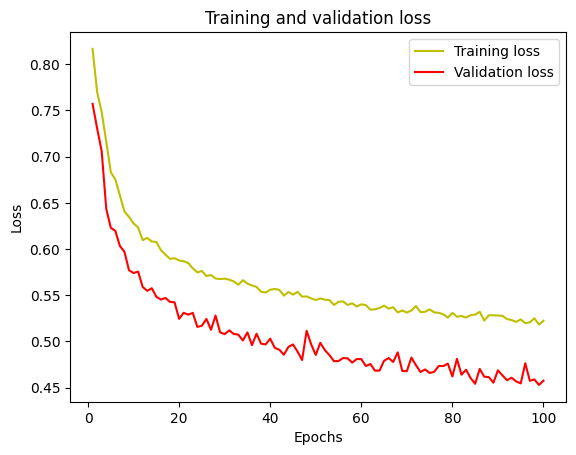

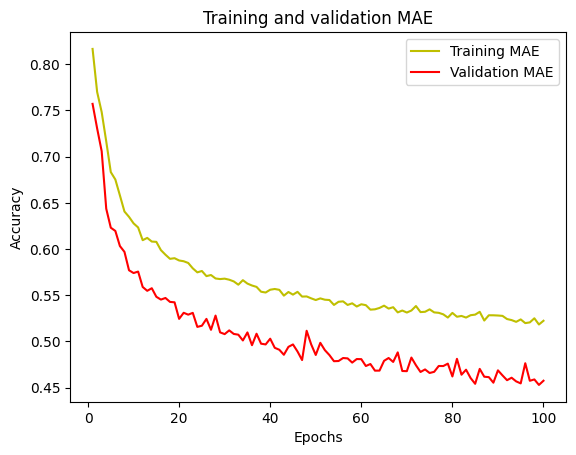

153/153 [==============================] - 0s 761us/step
Predicted values are:  [[19.156395  13.555653  34.686543   1.8750514 31.958551 ]
 [27.518768  18.405098  23.330774   1.444607  63.224895 ]
 [46.03846   34.470085  36.554573   1.6728531 52.832405 ]
 ...
 [ 7.4120107  4.7785783 18.072586   1.340238  74.565735 ]
 [10.510113   7.202822  15.207161   1.4764832 80.32732  ]
 [21.9636    15.87008   35.497032   2.5318348 14.874233 ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2021-01-26 11:00:00+02:00  14.0    7.0               42.0             2.0  \
2021-04-11 17:00:00+02:00   5.0    5.0               17.0             1.0   
2021-03-05 17:00:00+02:00  35.0   21.0               24.0             1.0   
2021-04-27 06:00:00+02:00  51.0   36.0               23.0             1.0   
2022-05-10 03:00:00+02:00  20.0   16.0               26.0             2.0   
...      

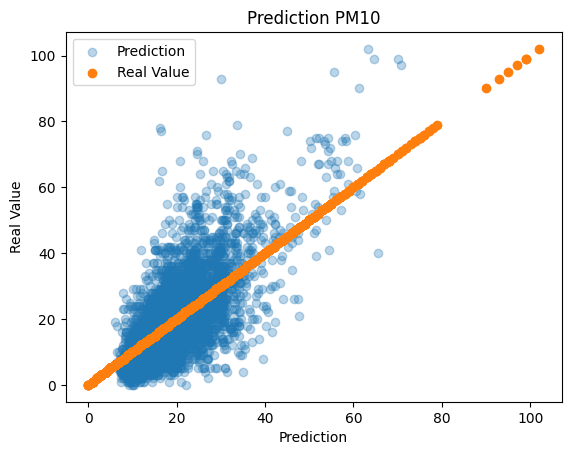

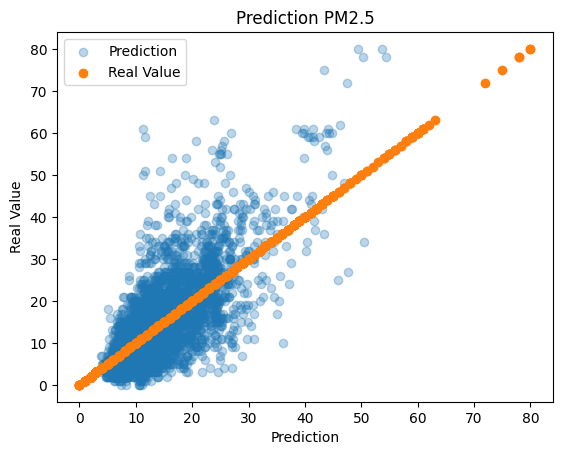

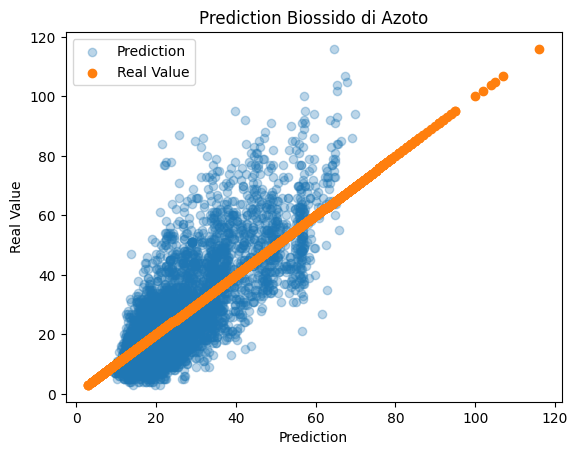

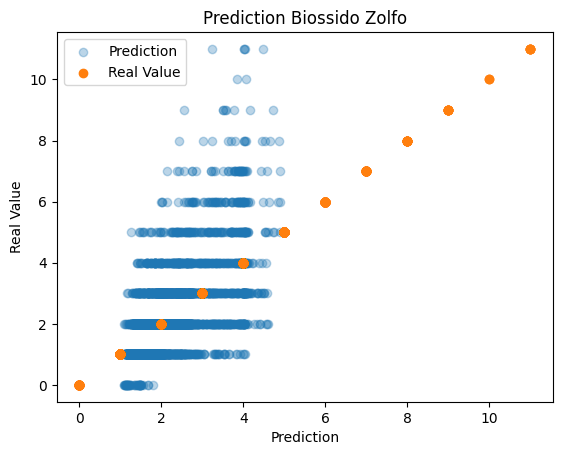

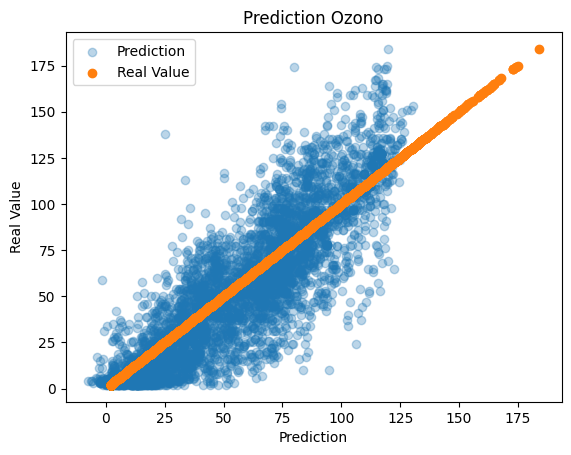

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                512       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 16)               

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 5ms/step - loss: 0.7340 - mean_squared_error: 0.7340 - val_loss: 0.6690 - val_mean_squared_error: 0.6690
Epoch 2/100
351/354 [============================>.] - ETA: 0s - loss: 0.6868 - mean_squared_error: 0.6868
Epoch 2: val_loss improved from 0.66896 to 0.64439, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6868 - mean_squared_error: 0.6868 - val_loss: 0.6444 - val_mean_squared_error: 0.6444
Epoch 3/100
338/354 [===========================>..] - ETA: 0s - loss: 0.6647 - mean_squared_error: 0.6647
Epoch 3: val_loss improved from 0.64439 to 0.64257, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6687 - mean_squared_error: 0.6687 - val_loss: 0.6426 - val_mean_squared_error: 0.6426
Epoch 4/100
336/354 [===========================>..] - ETA: 0s - loss: 0.6608 - mean_squared_error: 0.6608
Epoch 4: val_loss improved from 0.64257 to 0.61128, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 7ms/step - loss: 0.6567 - mean_squared_error: 0.6567 - val_loss: 0.6113 - val_mean_squared_error: 0.6113
Epoch 5/100
335/354 [===========================>..] - ETA: 0s - loss: 0.6494 - mean_squared_error: 0.6494
Epoch 5: val_loss improved from 0.61128 to 0.60129, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 7ms/step - loss: 0.6448 - mean_squared_error: 0.6448 - val_loss: 0.6013 - val_mean_squared_error: 0.6013
Epoch 6/100
346/354 [============================>.] - ETA: 0s - loss: 0.6416 - mean_squared_error: 0.6416
Epoch 6: val_loss improved from 0.60129 to 0.59242, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6405 - mean_squared_error: 0.6405 - val_loss: 0.5924 - val_mean_squared_error: 0.5924
Epoch 7/100
344/354 [============================>.] - ETA: 0s - loss: 0.6292 - mean_squared_error: 0.6292
Epoch 7: val_loss improved from 0.59242 to 0.58099, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6282 - mean_squared_error: 0.6282 - val_loss: 0.5810 - val_mean_squared_error: 0.5810
Epoch 8/100
349/354 [============================>.] - ETA: 0s - loss: 0.6191 - mean_squared_error: 0.6191
Epoch 8: val_loss improved from 0.58099 to 0.57605, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 7ms/step - loss: 0.6201 - mean_squared_error: 0.6201 - val_loss: 0.5761 - val_mean_squared_error: 0.5761
Epoch 9/100
351/354 [============================>.] - ETA: 0s - loss: 0.6133 - mean_squared_error: 0.6133
Epoch 9: val_loss improved from 0.57605 to 0.57088, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6137 - mean_squared_error: 0.6137 - val_loss: 0.5709 - val_mean_squared_error: 0.5709
Epoch 10/100
350/354 [============================>.] - ETA: 0s - loss: 0.6062 - mean_squared_error: 0.6062
Epoch 10: val_loss improved from 0.57088 to 0.56698, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6080 - mean_squared_error: 0.6080 - val_loss: 0.5670 - val_mean_squared_error: 0.5670
Epoch 11/100
343/354 [============================>.] - ETA: 0s - loss: 0.6024 - mean_squared_error: 0.6024
Epoch 11: val_loss improved from 0.56698 to 0.55642, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.6027 - mean_squared_error: 0.6027 - val_loss: 0.5564 - val_mean_squared_error: 0.5564
Epoch 12/100
334/354 [===========================>..] - ETA: 0s - loss: 0.5960 - mean_squared_error: 0.5960
Epoch 12: val_loss did not improve from 0.55642
354/354 [==============================] - 1s 3ms/step - loss: 0.5981 - mean_squared_error: 0.5981 - val_loss: 0.5574 - val_mean_squared_error: 0.5574
Epoch 13/100
350/354 [============================>.] - ETA: 0s - loss: 0.5955 - mean_squared_error: 0.5955
Epoch 13: val_loss improved from 0.55642 to 0.55359, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5970 - mean_squared_error: 0.5970 - val_loss: 0.5536 - val_mean_squared_error: 0.5536
Epoch 14/100
351/354 [============================>.] - ETA: 0s - loss: 0.5948 - mean_squared_error: 0.5948
Epoch 14: val_loss improved from 0.55359 to 0.54905, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5941 - mean_squared_error: 0.5941 - val_loss: 0.5491 - val_mean_squared_error: 0.5491
Epoch 15/100
341/354 [===========================>..] - ETA: 0s - loss: 0.5856 - mean_squared_error: 0.5856
Epoch 15: val_loss improved from 0.54905 to 0.54224, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5870 - mean_squared_error: 0.5870 - val_loss: 0.5422 - val_mean_squared_error: 0.5422
Epoch 16/100
331/354 [===========================>..] - ETA: 0s - loss: 0.5903 - mean_squared_error: 0.5903
Epoch 16: val_loss did not improve from 0.54224
354/354 [==============================] - 1s 3ms/step - loss: 0.5870 - mean_squared_error: 0.5870 - val_loss: 0.5462 - val_mean_squared_error: 0.5462
Epoch 17/100
345/354 [============================>.] - ETA: 0s - loss: 0.5833 - mean_squared_error: 0.5833
Epoch 17: val_loss improved from 0.54224 to 0.54068, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5841 - mean_squared_error: 0.5841 - val_loss: 0.5407 - val_mean_squared_error: 0.5407
Epoch 18/100
335/354 [===========================>..] - ETA: 0s - loss: 0.5780 - mean_squared_error: 0.5780
Epoch 18: val_loss improved from 0.54068 to 0.53977, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5796 - mean_squared_error: 0.5796 - val_loss: 0.5398 - val_mean_squared_error: 0.5398
Epoch 19/100
342/354 [===========================>..] - ETA: 0s - loss: 0.5790 - mean_squared_error: 0.5790
Epoch 19: val_loss improved from 0.53977 to 0.53316, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 7ms/step - loss: 0.5792 - mean_squared_error: 0.5792 - val_loss: 0.5332 - val_mean_squared_error: 0.5332
Epoch 20/100
345/354 [============================>.] - ETA: 0s - loss: 0.5752 - mean_squared_error: 0.5752
Epoch 20: val_loss improved from 0.53316 to 0.52829, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5755 - mean_squared_error: 0.5755 - val_loss: 0.5283 - val_mean_squared_error: 0.5283
Epoch 21/100
351/354 [============================>.] - ETA: 0s - loss: 0.5769 - mean_squared_error: 0.5769
Epoch 21: val_loss improved from 0.52829 to 0.52643, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5766 - mean_squared_error: 0.5766 - val_loss: 0.5264 - val_mean_squared_error: 0.5264
Epoch 22/100
347/354 [============================>.] - ETA: 0s - loss: 0.5681 - mean_squared_error: 0.5681
Epoch 22: val_loss did not improve from 0.52643
354/354 [==============================] - 1s 3ms/step - loss: 0.5712 - mean_squared_error: 0.5712 - val_loss: 0.5308 - val_mean_squared_error: 0.5308
Epoch 23/100
345/354 [============================>.] - ETA: 0s - loss: 0.5713 - mean_squared_error: 0.5713
Epoch 23: val_loss did not improve from 0.52643
354/354 [==============================] - 1s 3ms/step - loss: 0.5713 - mean_squared_error: 0.5713 - val_loss: 0.5298 - val_mean_squared_error: 0.5298
Epoch 24/100
339/354 [===========================>..] - ETA: 0s - loss: 0.5695 - mean_squared_error: 0.5695
Epoch 24: val_loss did not improve from 0.52643
354/354 [==============================] - 1s 3ms/step - loss: 0.5693 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5624 - mean_squared_error: 0.5624 - val_loss: 0.5194 - val_mean_squared_error: 0.5194
Epoch 26/100
335/354 [===========================>..] - ETA: 0s - loss: 0.5652 - mean_squared_error: 0.5652
Epoch 26: val_loss improved from 0.51940 to 0.51598, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5687 - mean_squared_error: 0.5687 - val_loss: 0.5160 - val_mean_squared_error: 0.5160
Epoch 27/100
343/354 [============================>.] - ETA: 0s - loss: 0.5630 - mean_squared_error: 0.5630
Epoch 27: val_loss did not improve from 0.51598
354/354 [==============================] - 1s 3ms/step - loss: 0.5623 - mean_squared_error: 0.5623 - val_loss: 0.5447 - val_mean_squared_error: 0.5447
Epoch 28/100
337/354 [===========================>..] - ETA: 0s - loss: 0.5640 - mean_squared_error: 0.5640
Epoch 28: val_loss improved from 0.51598 to 0.51428, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5612 - mean_squared_error: 0.5612 - val_loss: 0.5143 - val_mean_squared_error: 0.5143
Epoch 29/100
351/354 [============================>.] - ETA: 0s - loss: 0.5653 - mean_squared_error: 0.5653
Epoch 29: val_loss did not improve from 0.51428
354/354 [==============================] - 1s 3ms/step - loss: 0.5648 - mean_squared_error: 0.5648 - val_loss: 0.5146 - val_mean_squared_error: 0.5146
Epoch 30/100
332/354 [===========================>..] - ETA: 0s - loss: 0.5628 - mean_squared_error: 0.5628
Epoch 30: val_loss improved from 0.51428 to 0.51427, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5604 - mean_squared_error: 0.5604 - val_loss: 0.5143 - val_mean_squared_error: 0.5143
Epoch 31/100
336/354 [===========================>..] - ETA: 0s - loss: 0.5505 - mean_squared_error: 0.5505
Epoch 31: val_loss improved from 0.51427 to 0.50239, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 7ms/step - loss: 0.5506 - mean_squared_error: 0.5506 - val_loss: 0.5024 - val_mean_squared_error: 0.5024
Epoch 32/100
343/354 [============================>.] - ETA: 0s - loss: 0.5541 - mean_squared_error: 0.5541
Epoch 32: val_loss did not improve from 0.50239
354/354 [==============================] - 1s 2ms/step - loss: 0.5561 - mean_squared_error: 0.5561 - val_loss: 0.5066 - val_mean_squared_error: 0.5066
Epoch 33/100
332/354 [===========================>..] - ETA: 0s - loss: 0.5534 - mean_squared_error: 0.5534
Epoch 33: val_loss improved from 0.50239 to 0.49866, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5536 - mean_squared_error: 0.5536 - val_loss: 0.4987 - val_mean_squared_error: 0.4987
Epoch 34/100
350/354 [============================>.] - ETA: 0s - loss: 0.5488 - mean_squared_error: 0.5488
Epoch 34: val_loss improved from 0.49866 to 0.49613, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 7ms/step - loss: 0.5494 - mean_squared_error: 0.5494 - val_loss: 0.4961 - val_mean_squared_error: 0.4961
Epoch 35/100
349/354 [============================>.] - ETA: 0s - loss: 0.5515 - mean_squared_error: 0.5515
Epoch 35: val_loss did not improve from 0.49613
354/354 [==============================] - 1s 3ms/step - loss: 0.5515 - mean_squared_error: 0.5515 - val_loss: 0.4990 - val_mean_squared_error: 0.4990
Epoch 36/100
350/354 [============================>.] - ETA: 0s - loss: 0.5482 - mean_squared_error: 0.5482
Epoch 36: val_loss improved from 0.49613 to 0.49198, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5483 - mean_squared_error: 0.5483 - val_loss: 0.4920 - val_mean_squared_error: 0.4920
Epoch 37/100
343/354 [============================>.] - ETA: 0s - loss: 0.5507 - mean_squared_error: 0.5507
Epoch 37: val_loss improved from 0.49198 to 0.48946, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 7ms/step - loss: 0.5481 - mean_squared_error: 0.5481 - val_loss: 0.4895 - val_mean_squared_error: 0.4895
Epoch 38/100
350/354 [============================>.] - ETA: 0s - loss: 0.5427 - mean_squared_error: 0.5427
Epoch 38: val_loss improved from 0.48946 to 0.48490, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 3s 8ms/step - loss: 0.5425 - mean_squared_error: 0.5425 - val_loss: 0.4849 - val_mean_squared_error: 0.4849
Epoch 39/100
335/354 [===========================>..] - ETA: 0s - loss: 0.5477 - mean_squared_error: 0.5477
Epoch 39: val_loss did not improve from 0.48490
354/354 [==============================] - 1s 3ms/step - loss: 0.5472 - mean_squared_error: 0.5472 - val_loss: 0.4924 - val_mean_squared_error: 0.4924
Epoch 40/100
342/354 [===========================>..] - ETA: 0s - loss: 0.5391 - mean_squared_error: 0.5391
Epoch 40: val_loss did not improve from 0.48490
354/354 [==============================] - 1s 3ms/step - loss: 0.5397 - mean_squared_error: 0.5397 - val_loss: 0.4878 - val_mean_squared_error: 0.4878
Epoch 41/100
338/354 [===========================>..] - ETA: 0s - loss: 0.5397 - mean_squared_error: 0.5397
Epoch 41: val_loss improved from 0.48490 to 0.48034, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5384 - mean_squared_error: 0.5384 - val_loss: 0.4803 - val_mean_squared_error: 0.4803
Epoch 42/100
348/354 [============================>.] - ETA: 0s - loss: 0.5345 - mean_squared_error: 0.5345
Epoch 42: val_loss did not improve from 0.48034
354/354 [==============================] - 1s 3ms/step - loss: 0.5369 - mean_squared_error: 0.5369 - val_loss: 0.4815 - val_mean_squared_error: 0.4815
Epoch 43/100
351/354 [============================>.] - ETA: 0s - loss: 0.5417 - mean_squared_error: 0.5417
Epoch 43: val_loss did not improve from 0.48034
354/354 [==============================] - 1s 3ms/step - loss: 0.5408 - mean_squared_error: 0.5408 - val_loss: 0.4827 - val_mean_squared_error: 0.4827
Epoch 44/100
348/354 [============================>.] - ETA: 0s - loss: 0.5391 - mean_squared_error: 0.5391
Epoch 44: val_loss improved from 0.48034 to 0.47994, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5396 - mean_squared_error: 0.5396 - val_loss: 0.4799 - val_mean_squared_error: 0.4799
Epoch 45/100
331/354 [===========================>..] - ETA: 0s - loss: 0.5434 - mean_squared_error: 0.5434
Epoch 45: val_loss did not improve from 0.47994
354/354 [==============================] - 1s 3ms/step - loss: 0.5411 - mean_squared_error: 0.5411 - val_loss: 0.4815 - val_mean_squared_error: 0.4815
Epoch 46/100
354/354 [==============================] - ETA: 0s - loss: 0.5329 - mean_squared_error: 0.5329
Epoch 46: val_loss improved from 0.47994 to 0.47100, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5329 - mean_squared_error: 0.5329 - val_loss: 0.4710 - val_mean_squared_error: 0.4710
Epoch 47/100
330/354 [==========================>...] - ETA: 0s - loss: 0.5277 - mean_squared_error: 0.5277
Epoch 47: val_loss did not improve from 0.47100
354/354 [==============================] - 1s 3ms/step - loss: 0.5307 - mean_squared_error: 0.5307 - val_loss: 0.4736 - val_mean_squared_error: 0.4736
Epoch 48/100
344/354 [============================>.] - ETA: 0s - loss: 0.5335 - mean_squared_error: 0.5335
Epoch 48: val_loss did not improve from 0.47100
354/354 [==============================] - 1s 2ms/step - loss: 0.5338 - mean_squared_error: 0.5338 - val_loss: 0.4796 - val_mean_squared_error: 0.4796
Epoch 49/100
340/354 [===========================>..] - ETA: 0s - loss: 0.5326 - mean_squared_error: 0.5326
Epoch 49: val_loss improved from 0.47100 to 0.46754, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5321 - mean_squared_error: 0.5321 - val_loss: 0.4675 - val_mean_squared_error: 0.4675
Epoch 50/100
342/354 [===========================>..] - ETA: 0s - loss: 0.5315 - mean_squared_error: 0.5315
Epoch 50: val_loss did not improve from 0.46754
354/354 [==============================] - 1s 3ms/step - loss: 0.5326 - mean_squared_error: 0.5326 - val_loss: 0.4728 - val_mean_squared_error: 0.4728
Epoch 51/100
350/354 [============================>.] - ETA: 0s - loss: 0.5304 - mean_squared_error: 0.5304
Epoch 51: val_loss did not improve from 0.46754
354/354 [==============================] - 1s 3ms/step - loss: 0.5305 - mean_squared_error: 0.5305 - val_loss: 0.4739 - val_mean_squared_error: 0.4739
Epoch 52/100
333/354 [===========================>..] - ETA: 0s - loss: 0.5261 - mean_squared_error: 0.5261
Epoch 52: val_loss did not improve from 0.46754
354/354 [==============================] - 1s 3ms/step - loss: 0.5280 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5275 - mean_squared_error: 0.5275 - val_loss: 0.4656 - val_mean_squared_error: 0.4656
Epoch 56/100
346/354 [============================>.] - ETA: 0s - loss: 0.5245 - mean_squared_error: 0.5245
Epoch 56: val_loss improved from 0.46563 to 0.45759, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 7ms/step - loss: 0.5256 - mean_squared_error: 0.5256 - val_loss: 0.4576 - val_mean_squared_error: 0.4576
Epoch 57/100
348/354 [============================>.] - ETA: 0s - loss: 0.5263 - mean_squared_error: 0.5263
Epoch 57: val_loss did not improve from 0.45759
354/354 [==============================] - 1s 3ms/step - loss: 0.5260 - mean_squared_error: 0.5260 - val_loss: 0.4613 - val_mean_squared_error: 0.4613
Epoch 58/100
337/354 [===========================>..] - ETA: 0s - loss: 0.5286 - mean_squared_error: 0.5286
Epoch 58: val_loss did not improve from 0.45759
354/354 [==============================] - 1s 2ms/step - loss: 0.5264 - mean_squared_error: 0.5264 - val_loss: 0.4638 - val_mean_squared_error: 0.4638
Epoch 59/100
348/354 [============================>.] - ETA: 0s - loss: 0.5220 - mean_squared_error: 0.5220
Epoch 59: val_loss did not improve from 0.45759
354/354 [==============================] - 1s 3ms/step - loss: 0.5206 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5174 - mean_squared_error: 0.5174 - val_loss: 0.4560 - val_mean_squared_error: 0.4560
Epoch 62/100
332/354 [===========================>..] - ETA: 0s - loss: 0.5267 - mean_squared_error: 0.5267
Epoch 62: val_loss improved from 0.45600 to 0.45572, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5253 - mean_squared_error: 0.5253 - val_loss: 0.4557 - val_mean_squared_error: 0.4557
Epoch 63/100
352/354 [============================>.] - ETA: 0s - loss: 0.5166 - mean_squared_error: 0.5166
Epoch 63: val_loss did not improve from 0.45572
354/354 [==============================] - 1s 2ms/step - loss: 0.5171 - mean_squared_error: 0.5171 - val_loss: 0.4595 - val_mean_squared_error: 0.4595
Epoch 64/100
326/354 [==========================>...] - ETA: 0s - loss: 0.5140 - mean_squared_error: 0.5140
Epoch 64: val_loss did not improve from 0.45572
354/354 [==============================] - 1s 2ms/step - loss: 0.5132 - mean_squared_error: 0.5132 - val_loss: 0.4591 - val_mean_squared_error: 0.4591
Epoch 65/100
351/354 [============================>.] - ETA: 0s - loss: 0.5170 - mean_squared_error: 0.5170
Epoch 65: val_loss improved from 0.45572 to 0.45500, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5170 - mean_squared_error: 0.5170 - val_loss: 0.4550 - val_mean_squared_error: 0.4550
Epoch 66/100
336/354 [===========================>..] - ETA: 0s - loss: 0.5188 - mean_squared_error: 0.5188
Epoch 66: val_loss did not improve from 0.45500
354/354 [==============================] - 1s 2ms/step - loss: 0.5185 - mean_squared_error: 0.5185 - val_loss: 0.4577 - val_mean_squared_error: 0.4577
Epoch 67/100
341/354 [===========================>..] - ETA: 0s - loss: 0.5161 - mean_squared_error: 0.5161
Epoch 67: val_loss improved from 0.45500 to 0.45319, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5160 - mean_squared_error: 0.5160 - val_loss: 0.4532 - val_mean_squared_error: 0.4532
Epoch 68/100
331/354 [===========================>..] - ETA: 0s - loss: 0.5148 - mean_squared_error: 0.5148
Epoch 68: val_loss improved from 0.45319 to 0.45095, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5134 - mean_squared_error: 0.5134 - val_loss: 0.4510 - val_mean_squared_error: 0.4510
Epoch 69/100
343/354 [============================>.] - ETA: 0s - loss: 0.5177 - mean_squared_error: 0.5177
Epoch 69: val_loss improved from 0.45095 to 0.44776, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5171 - mean_squared_error: 0.5171 - val_loss: 0.4478 - val_mean_squared_error: 0.4478
Epoch 70/100
347/354 [============================>.] - ETA: 0s - loss: 0.5173 - mean_squared_error: 0.5173
Epoch 70: val_loss did not improve from 0.44776
354/354 [==============================] - 1s 2ms/step - loss: 0.5178 - mean_squared_error: 0.5178 - val_loss: 0.4605 - val_mean_squared_error: 0.4605
Epoch 71/100
330/354 [==========================>...] - ETA: 0s - loss: 0.5116 - mean_squared_error: 0.5116
Epoch 71: val_loss did not improve from 0.44776
354/354 [==============================] - 1s 2ms/step - loss: 0.5126 - mean_squared_error: 0.5126 - val_loss: 0.4603 - val_mean_squared_error: 0.4603
Epoch 72/100
328/354 [==========================>...] - ETA: 0s - loss: 0.5165 - mean_squared_error: 0.5165
Epoch 72: val_loss did not improve from 0.44776
354/354 [==============================] - 1s 2ms/step - loss: 0.5175 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5117 - mean_squared_error: 0.5117 - val_loss: 0.4419 - val_mean_squared_error: 0.4419
Epoch 74/100
345/354 [============================>.] - ETA: 0s - loss: 0.5119 - mean_squared_error: 0.5119
Epoch 74: val_loss did not improve from 0.44195
354/354 [==============================] - 1s 2ms/step - loss: 0.5122 - mean_squared_error: 0.5122 - val_loss: 0.4467 - val_mean_squared_error: 0.4467
Epoch 75/100
349/354 [============================>.] - ETA: 0s - loss: 0.5160 - mean_squared_error: 0.5160
Epoch 75: val_loss did not improve from 0.44195
354/354 [==============================] - 1s 2ms/step - loss: 0.5150 - mean_squared_error: 0.5150 - val_loss: 0.4487 - val_mean_squared_error: 0.4487
Epoch 76/100
350/354 [============================>.] - ETA: 0s - loss: 0.5062 - mean_squared_error: 0.5062
Epoch 76: val_loss improved from 0.44195 to 0.44105, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 4ms/step - loss: 0.5075 - mean_squared_error: 0.5075 - val_loss: 0.4410 - val_mean_squared_error: 0.4410
Epoch 77/100
346/354 [============================>.] - ETA: 0s - loss: 0.5109 - mean_squared_error: 0.5109
Epoch 77: val_loss improved from 0.44105 to 0.44028, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.5086 - mean_squared_error: 0.5086 - val_loss: 0.4403 - val_mean_squared_error: 0.4403
Epoch 78/100
338/354 [===========================>..] - ETA: 0s - loss: 0.5089 - mean_squared_error: 0.5089
Epoch 78: val_loss did not improve from 0.44028
354/354 [==============================] - 1s 3ms/step - loss: 0.5079 - mean_squared_error: 0.5079 - val_loss: 0.4440 - val_mean_squared_error: 0.4440
Epoch 79/100
347/354 [============================>.] - ETA: 0s - loss: 0.5074 - mean_squared_error: 0.5074
Epoch 79: val_loss did not improve from 0.44028
354/354 [==============================] - 1s 3ms/step - loss: 0.5069 - mean_squared_error: 0.5069 - val_loss: 0.4408 - val_mean_squared_error: 0.4408
Epoch 80/100
346/354 [============================>.] - ETA: 0s - loss: 0.5081 - mean_squared_error: 0.5081
Epoch 80: val_loss did not improve from 0.44028
354/354 [==============================] - 1s 2ms/step - loss: 0.5070 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 6ms/step - loss: 0.4991 - mean_squared_error: 0.4991 - val_loss: 0.4311 - val_mean_squared_error: 0.4311
Epoch 82/100
344/354 [============================>.] - ETA: 0s - loss: 0.4985 - mean_squared_error: 0.4985
Epoch 82: val_loss did not improve from 0.43112
354/354 [==============================] - 1s 2ms/step - loss: 0.5014 - mean_squared_error: 0.5014 - val_loss: 0.4365 - val_mean_squared_error: 0.4365
Epoch 83/100
331/354 [===========================>..] - ETA: 0s - loss: 0.5044 - mean_squared_error: 0.5044
Epoch 83: val_loss did not improve from 0.43112
354/354 [==============================] - 1s 2ms/step - loss: 0.5031 - mean_squared_error: 0.5031 - val_loss: 0.4392 - val_mean_squared_error: 0.4392
Epoch 84/100
332/354 [===========================>..] - ETA: 0s - loss: 0.5097 - mean_squared_error: 0.5097
Epoch 84: val_loss did not improve from 0.43112
354/354 [==============================] - 1s 2ms/step - loss: 0.5089 - mean_sq

INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5032 - mean_squared_error: 0.5032 - val_loss: 0.4309 - val_mean_squared_error: 0.4309
Epoch 89/100
326/354 [==========================>...] - ETA: 0s - loss: 0.5059 - mean_squared_error: 0.5059
Epoch 89: val_loss improved from 0.43088 to 0.42860, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.4286 - val_mean_squared_error: 0.4286
Epoch 90/100
347/354 [============================>.] - ETA: 0s - loss: 0.5069 - mean_squared_error: 0.5069
Epoch 90: val_loss did not improve from 0.42860
354/354 [==============================] - 1s 2ms/step - loss: 0.5068 - mean_squared_error: 0.5068 - val_loss: 0.4325 - val_mean_squared_error: 0.4325
Epoch 91/100
354/354 [==============================] - ETA: 0s - loss: 0.4987 - mean_squared_error: 0.4987
Epoch 91: val_loss did not improve from 0.42860
354/354 [==============================] - 1s 2ms/step - loss: 0.4987 - mean_squared_error: 0.4987 - val_loss: 0.4369 - val_mean_squared_error: 0.4369
Epoch 92/100
334/354 [===========================>..] - ETA: 0s - loss: 0.4990 - mean_squared_error: 0.4990
Epoch 92: val_loss improved from 0.42860 to 0.42636, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.4999 - mean_squared_error: 0.4999 - val_loss: 0.4264 - val_mean_squared_error: 0.4264
Epoch 93/100
348/354 [============================>.] - ETA: 0s - loss: 0.4998 - mean_squared_error: 0.4998
Epoch 93: val_loss did not improve from 0.42636
354/354 [==============================] - 1s 2ms/step - loss: 0.4988 - mean_squared_error: 0.4988 - val_loss: 0.4327 - val_mean_squared_error: 0.4327
Epoch 94/100
349/354 [============================>.] - ETA: 0s - loss: 0.5025 - mean_squared_error: 0.5025
Epoch 94: val_loss improved from 0.42636 to 0.42610, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.5017 - mean_squared_error: 0.5017 - val_loss: 0.4261 - val_mean_squared_error: 0.4261
Epoch 95/100
335/354 [===========================>..] - ETA: 0s - loss: 0.4915 - mean_squared_error: 0.4915
Epoch 95: val_loss improved from 0.42610 to 0.41993, saving model to ./tmp\checkpoint


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


INFO:tensorflow:Assets written to: ./tmp\checkpoint\assets


354/354 [==============================] - 2s 5ms/step - loss: 0.4912 - mean_squared_error: 0.4912 - val_loss: 0.4199 - val_mean_squared_error: 0.4199
Epoch 96/100
353/354 [============================>.] - ETA: 0s - loss: 0.4981 - mean_squared_error: 0.4981
Epoch 96: val_loss did not improve from 0.41993
354/354 [==============================] - 1s 3ms/step - loss: 0.4980 - mean_squared_error: 0.4980 - val_loss: 0.4246 - val_mean_squared_error: 0.4246
Epoch 97/100
336/354 [===========================>..] - ETA: 0s - loss: 0.5051 - mean_squared_error: 0.5051
Epoch 97: val_loss did not improve from 0.41993
354/354 [==============================] - 1s 3ms/step - loss: 0.5038 - mean_squared_error: 0.5038 - val_loss: 0.4296 - val_mean_squared_error: 0.4296
Epoch 98/100
346/354 [============================>.] - ETA: 0s - loss: 0.4968 - mean_squared_error: 0.4968
Epoch 98: val_loss did not improve from 0.41993
354/354 [==============================] - 1s 3ms/step - loss: 0.4968 - mean_sq

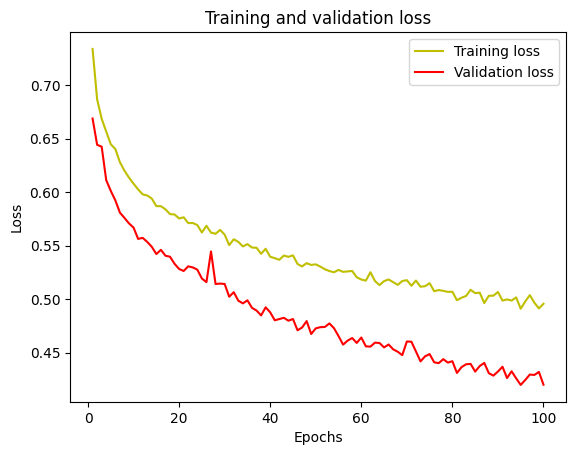

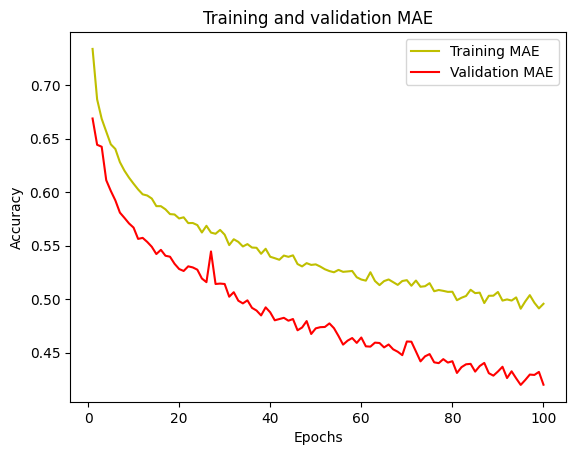

190/190 [==============================] - 0s 2ms/step
Predicted values are:  [[ 14.014648    9.077757   17.34047     1.4252787  68.68627  ]
 [ 13.140529    8.399745   14.901893    1.4961598  76.2875   ]
 [ 27.616692   20.515493   42.824696    2.345285   14.07537  ]
 ...
 [ 22.434763   16.472649   38.036705    3.3480477   5.751422 ]
 [ 21.22905    15.022852   15.72567     2.2905385 101.50172  ]
 [ 18.33245    12.131053   20.033995    1.7484266  46.193127 ]]
Real values are:                             PM10  PM2.5  Biossido di Azoto  Biossido Zolfo   
ts                                                                          
2021-07-05 23:00:00+02:00  15.0    9.0               16.0             1.0  \
2023-06-26 01:00:00+02:00  24.0   12.0               13.0             1.0   
2022-03-04 10:00:00+02:00  59.0   48.0               56.0             4.0   
2022-01-29 15:00:00+02:00   9.0    4.0               27.0             1.0   
2023-02-19 09:00:00+02:00  65.0   58.0               40.0 

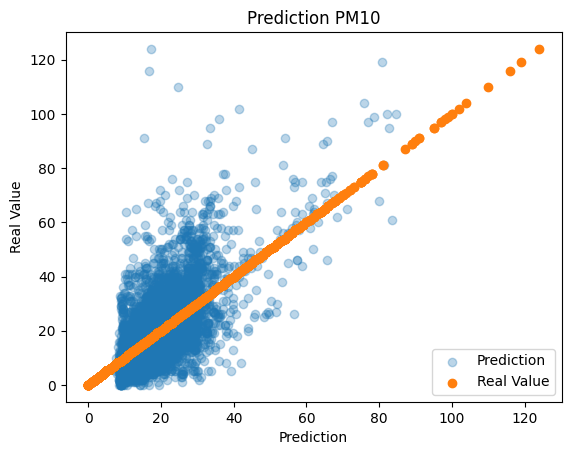

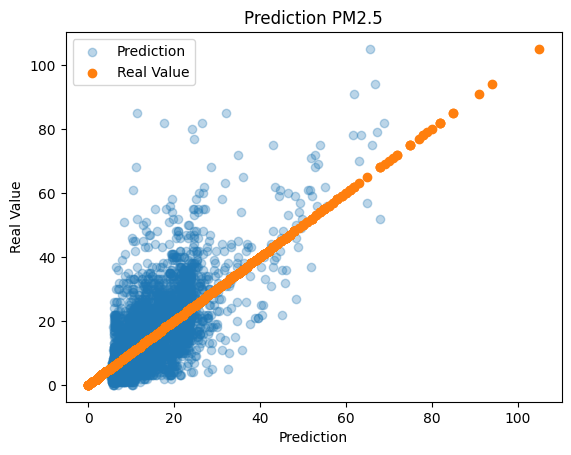

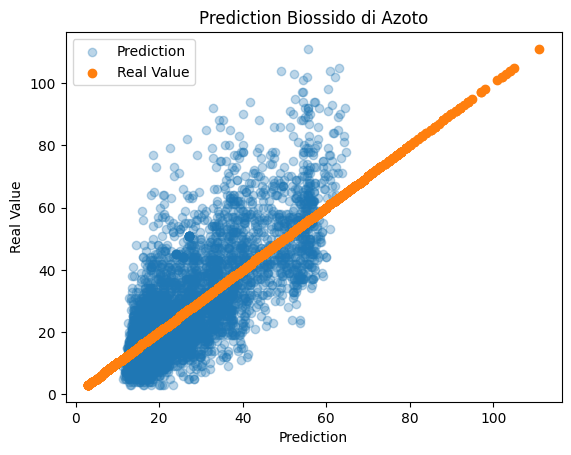

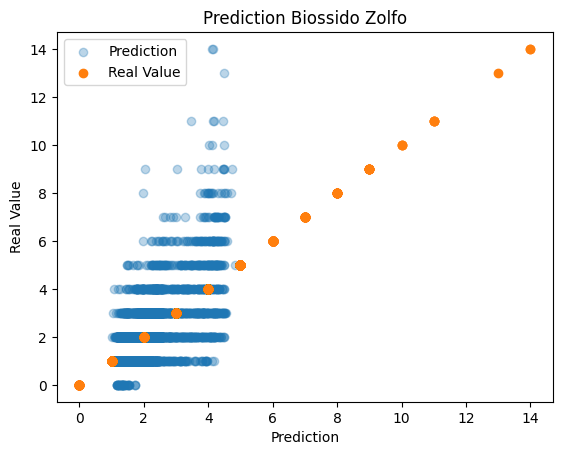

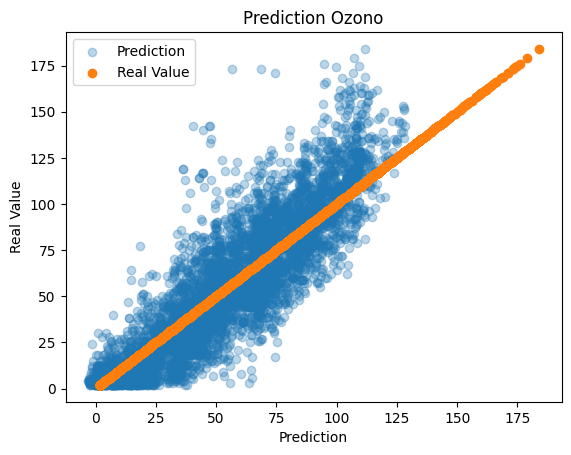

ValueError: cannot insert level_0, already exists

In [13]:



# df_appa = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA1.csv")
# df_appa
# df_appa.Time = pd.to_datetime(df_appa.Time)
# timezone_offset = datetime.timedelta(hours=2)
# timezone = datetime.timezone(timezone_offset)

# df_appa.Time = df_appa.Time.apply(lambda x: x.replace(tzinfo=timezone))
# df_appa.rename(columns={"Time": "ts"}, inplace=True)

ind=0
lista_pollutant=[df1_StChiara, df4_StChiara, df5_StChiara, df7_StChiara, df8_StChiara, df11_StChiara, df12_StChiara, df13_StChiara, df14_StChiara, df15_StChiara] #df 9 and 10 are TBD


# # data_ini= [date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,4,29), date(2021,6,30), date(2022,2,24), date(2022,2,24)]
# # data_fini=[date(2023,6,26), date(2021,4,29), date(2021,6,30), date(2023,5,24), date(2022,2,24), date(2023,6,26), date(2023,6,26), date(2023,6,26)]

data_ini= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-06-30", "2022-01-14", "2021-01-13", "2022-06-30", "2022-01-14", "2023-02-08", "2023-02-08"]
data_fini=["2023-02-08", "2023-06-26", "2021-04-29", "2023-06-26", "2023-06-26", "2023-06-26", "2023-02-08", "2023-06-26", "2023-06-26", "2023-06-26"]

for i in lista_pollutant: 
    df_tot = dfAPPA.merge(lista_pollutant[ind].reset_index())

    df_tot = df_tot.set_index("ts")
    df_tot = df_tot.sort_index()
    df_tot = df_tot.dropna()


    dfSC = dfSC.reset_index()
    df_tot = df_tot.reset_index()

    df_tot.ts=tempo(df_tot)
    dfSC.ts=tempo(dfSC)




    DFTOT = df_tot.merge(dfSC[["ts","T", "RH", "P", "IAQ"]])

    try:
        DFTOT = DFTOT.set_index("ts")
    except:
        pass
    for i in DFTOT.columns:
        DFTOT[i] = pd.to_numeric(DFTOT[i],errors = "coerce" )
    DFTOT = DFTOT.dropna()

    DFTOT = DFTOT[data_ini[ind]:data_fini[ind]]


    X = DFTOT.drop(["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"], axis=1)

    y = DFTOT[["PM10", "PM2.5", "Biossido di Azoto", "Biossido Zolfo", "Ozono"]].copy()

    try:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM=1


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, shuffle = True)

    scaler=StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler=StandardScaler()
    scaler.fit(y_train)

    y_train_s = scaler.transform(y_train)
    y_test_s = pd.DataFrame(data = scaler.transform(y_test), columns = y_test.columns)
                            

    model = Sequential()

    model.add(Dense(64, kernel_initializer='normal',input_dim=INPUT_DIM, activation='selu'))

    model.add(Dropout(0.2))

    model.add(Dense(128, kernel_initializer='normal',activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer='normal',activation='selu'))
    model.add(Dropout(0.2))

    model.add(Dense(16, kernel_initializer='normal',activation='selu'))
    model.add(Dropout(0.2))

    model.add(Dense(OUTPUT_DIM, kernel_initializer='normal',activation='linear'))

    a2 = "mean_squared_error"
    model.compile(loss=a2, optimizer='adam', metrics=[a2])
    model.summary()

    checkpoint_name = './tmp/checkpoint' 
    checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='min')
    callbacks_list = [checkpoint]
    history = model.fit(X_train_scaled, y_train_s, validation_split=0.2, epochs=100,callbacks=[checkpoint])
    model.load_weights(checkpoint_name)

    pollutant1 = DFTOT["PM10"]
    pollutant2 = DFTOT["Biossido di Azoto"]
    pollutant3 = DFTOT["Biossido Zolfo"]
    pollutant4 = DFTOT["PM2.5"]
    pollutant5 = DFTOT["Ozono"]

    pollutants = [pollutant1,pollutant2,pollutant3,pollutant4,pollutant5]

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'y', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    acc = history.history['mean_squared_error']
    val_acc = history.history['val_mean_squared_error']
    plt.plot(epochs, acc, 'y', label='Training MAE')
    plt.plot(epochs, val_acc, 'r', label='Validation MAE')
    plt.title('Training and validation MAE')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    predictions = model.predict(X_test_scaled)

    predictions = scaler.inverse_transform(predictions)

    y_test_ssaved = y_test_s
    y_test_s = y_test
    print("Predicted values are: ", predictions)
    print("Real values are: ", y_test_s)
        

    t = np.arange(0, predictions.size, 1)

    for n,sens in enumerate(y_test.columns):
        plt.scatter(predictions[:,n], y_test_s[sens], label='Prediction', alpha=0.3)
        plt.scatter(y_test_s[sens], y_test_s[sens], label='Real Value')
        plt.title('Prediction '+ sens) 
        plt.xlabel('Prediction')
        plt.ylabel('Real Value')
        plt.legend()
        plt.show()
    ind += 1

In [2]:
df_appa = read_csv("C:/Users/ricca/OneDrive/challenge3/DataSet_APPA-20230628T154631Z-001/DataSet_APPA/APPA1.csv")
df_appa
df_appa.Time = pd.to_datetime(df_appa.Time)
timezone_offset = datetime.timedelta(hours=2)
timezone = datetime.timezone(timezone_offset)

df_appa.Time = df_appa.Time.apply(lambda x: x.replace(tzinfo=timezone))
df_appa.rename(columns={"Time": "ts"}, inplace=True)

ind=0
lista_pollutant=[df1, df4, df5, df8, df10, df11, df12, df14]


# data_ini= [date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,1,13), date(2021,4,29), date(2021,6,30), date(2022,2,24), date(2022,2,24)]
# data_fini=[date(2023,6,26), date(2021,4,29), date(2021,6,30), date(2023,5,24), date(2022,2,24), date(2023,6,26), date(2023,6,26), date(2023,6,26)]

data_ini= ["2021-01-13", "2021-01-13", "2021-01-13", "2021-01-13", "2021-04-29", "2021-06-30", "2022-02-24", "2022-02-24"]
data_fini=["2023-06-26", "2021-04-29", "2021-06-30", "2023-05-24", "2022-02-24", "2023-06-26", "2023-06-26", "2023-06-26"]

for i in lista_pollutant:
    df8 = lista_pollutant[ind]
    
    df8 = df8.resample("1H").mean()
    df_tot = df8.reset_index().merge(df_appa)
    df_tot.set_index("ts", inplace=True)
    df_tot = df_tot.sort_index().dropna()
    df_tot = df_tot.dropna()
    def f_model(x, a, b, c, d, e):
        Sig, T, RH = x
        return a * Sig**b + d * T + e + c
          
    (
        popt,
        pcov,
    ) = curve_fit(f=f_model,
        xdata=(
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["V"].values,
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["R"].values,
            df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["HT"].values,
        ), ydata=df_tot.sort_index().loc[data_ini[ind]:data_fini[ind]]["Ossido di Carbonio"].values, p0=(4, 1, 1, 1, 1), maxfev=10000,)
    a_opt, b_opt, c_opt, d_opt, e_opt = popt
    df_tot["model 1"] = f_model(
        (df_tot["V"].values, df_tot["R"].values, df_tot["HT"].values),
        a_opt,
        b_opt,
        c_opt,
        d_opt,
        e_opt,
    )
    plt.scatter(df_tot["HT"], df_tot["model 1"])
    plt.scatter(df_tot["HT"], df_tot["HT"])
    X = df_tot.drop(["PM10","Ossido di Carbonio","Biossido di Azoto"], axis=1)

    y = df_tot["Biossido di Azoto"].copy()

    try :
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = len(y.columns)
    except:
        INPUT_DIM = len(X.columns)
        OUTPUT_DIM = 1
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, shuffle=True
    )
    scaler = StandardScaler()
    scaler.fit(X_train)

    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    scaler = StandardScaler()
    scaler.fit(y_train.values.reshape(-1,1))

    y_train_s = scaler.transform(y_train.values.reshape(-1,1))
    y_test_s = scaler.transform(y_test.values.reshape(-1,1))    
    

    a2 = "mean_squared_error"

    model = Sequential()
    model.add(
        Dense(64, kernel_initializer="normal", input_dim=INPUT_DIM, activation="selu")
    )
    model.add(Dropout(0.2))

    model.add(Dense(128, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))
    model.add(Dense(64, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))

    model.add(Dense(16, kernel_initializer="normal", activation="selu"))
    model.add(Dropout(0.2))

    model.add(Dense(OUTPUT_DIM, kernel_initializer="normal", activation="linear"))

    model.compile(loss=a2, optimizer="adam", metrics=[a2])
    model.summary()

    checkpoint_name = "./tmp/checkpoint"
    checkpoint = ModelCheckpoint(
        checkpoint_name, monitor="val_loss", verbose=1, save_best_only=True, mode="min"
    )
    callbacks_list = [checkpoint]
    history = model.fit(
        X_train_scaled, y_train_s, validation_split=0.2, epochs=300, callbacks=[checkpoint]
    )
    model.load_weights(checkpoint_name)


    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, "y", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


    acc = history.history["mean_squared_error"]
    val_acc = history.history["val_mean_squared_error"]
    plt.plot(epochs, acc, "y", label="Training MAE")
    plt.plot(epochs, val_acc, "r", label="Validation MAE")
    plt.title("Training and validation MAE")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    predictions = model.predict(X_test_scaled)

    predictions = scaler.inverse_transform(predictions)

    y_test_ssaved = y_test_s
    y_test_s = y_test
    print("Predicted values are: ", predictions)
    print("Real values are: ", y_test_s)

    t = np.arange(0, predictions.size, 1)
    plt.scatter(predictions, y_test_s, label="Prediction")
    plt.scatter(y_test_s, y_test_s, label="Real Value")
    plt.title("Prediction")
    plt.xlabel("Prediction")
    plt.ylabel("Real Value")
    plt.legend()
    plt.show()
    ind += 1

NameError: name 'read_csv' is not defined